# Predicting Default Payments with Fully-Connected NNs - Matteo Breganni 869549

The dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

### *Import and initial analysis

In [ ]:
import pandas as pd
from google.colab import drive

# Google drive mount
drive.mount('/content/drive')

# Import the training dataset
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Advanced Machine Learning/Assignment 1/train.csv")
X_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Advanced Machine Learning/Assignment 1/test.csv")

dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,19193,200000,2,1,1,38,-2,-2,-2,-2,...,2571,2571,2571,2772,2571,2571,2571,2571,2571,0
1,1131,230000,2,2,1,34,0,0,0,0,...,155335,153427,150514,8913,5449,5339,5370,4435,4432,1
2,17557,50000,2,2,2,42,0,0,0,0,...,49311,24663,24854,1763,2112,1756,324,336,351,0
3,29901,20000,1,2,2,29,0,0,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,14696,30000,2,3,1,59,1,2,2,2,...,30467,29858,28898,1950,200,2492,0,580,0,1


In [ ]:
dataset.shape

(25500, 25)

There are 24 features (because one is the id), for 25500 rows of data.

In [ ]:
print(dataset.dtypes)

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


Every feature is an int

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          25500 non-null  int64
 1   LIMIT_BAL                   25500 non-null  int64
 2   SEX                         25500 non-null  int64
 3   EDUCATION                   25500 non-null  int64
 4   MARRIAGE                    25500 non-null  int64
 5   AGE                         25500 non-null  int64
 6   PAY_0                       25500 non-null  int64
 7   PAY_2                       25500 non-null  int64
 8   PAY_3                       25500 non-null  int64
 9   PAY_4                       25500 non-null  int64
 10  PAY_5                       25500 non-null  int64
 11  PAY_6                       25500 non-null  int64
 12  BILL_AMT1                   25500 non-null  int64
 13  BILL_AMT2                   25500 non-null  int64
 14  BILL_A

There isn't any missing data (null)

In [ ]:
# Description of the first 5 features
dataset[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
count,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000
mean,167569.007059,1.604118,1.852353,1.550392,35.509294
std,130002.156470,0.489049,0.787991,0.522757,9.200408
min,10000.000000,1.000000,0.000000,0.000000,21.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000


##Inspecting the data

any comment about data dimensionality/distribution goes here

### Target

Not default: 19815
Default: 5685

Percentage of (next month) payments occurred: 77.71%
Percentage of (next month) payments missed: 22.29%


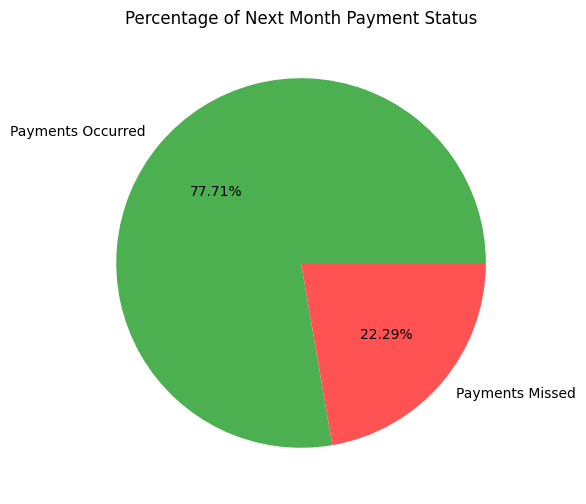

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of 0 and 1 in the target column
counts = dataset['default payment next month'].value_counts()

print(f"Not default: {counts[0]}")
print(f"Default: {counts[1]}")

# Calculate percentage
total_payments = counts.sum()
percentage_occurred = (counts[0] / total_payments) * 100
percentage_missed = (counts[1] / total_payments) * 100

print(f"\nPercentage of (next month) payments occurred: {percentage_occurred:.2f}%")
print(f"Percentage of (next month) payments missed: {percentage_missed:.2f}%")

# Labels and sizes for pie chart
labels = ['Payments Occurred', 'Payments Missed']
sizes = [percentage_occurred, percentage_missed]
colors = ['#4CAF50', '#FF5252']  # Green for occurred, Red for missed

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%')
plt.title('Percentage of Next Month Payment Status')
plt.show()

The target of the dataset is highly unbalanced.
Contrary to what was written in the assignment's description, I believe the target is to be interpreted this way: 1 (default) and 0 (not default), meaning that if the prediction is 1, that means next month there won't be a payment.
Regardless, my interpretation of the target won't matter in this case. The main issue is the big unbalance of the target.

### Features

#### Feature "LIMIT_BAL"

In [ ]:
dataset['LIMIT_BAL'].describe()

,LIMIT_BAL
count,25500.000000
mean,167569.007059
std,130002.156470
min,10000.000000
25%,50000.000000
50%,140000.000000
75%,240000.000000
max,1000000.000000


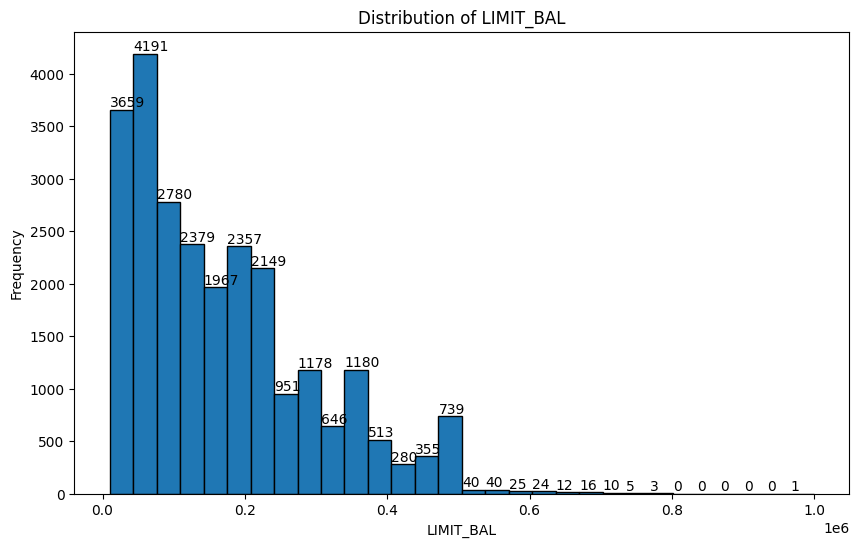

In [ ]:
# Plot the distribution of 'LIMIT_BAL'
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(dataset['LIMIT_BAL'], bins=30, edgecolor='black')

plt.title('Distribution of LIMIT_BAL')
plt.xlabel('LIMIT_BAL')
plt.ylabel('Frequency')

# Add frequency labels on top of each bar
for count, x in zip(n, bins):
    plt.text(x, count, str(int(count)), ha='left', va='bottom')

plt.show()


From this plot, we can notice there are a few outliers, and the feature isn't distributed well.

#### Feature "SEX"

In [ ]:
# Show the values of the SEX feature
dataset['SEX'].value_counts().sort_index()

,count
SEX,
1,10095
2,15405


Male: 10095
Female: 15405


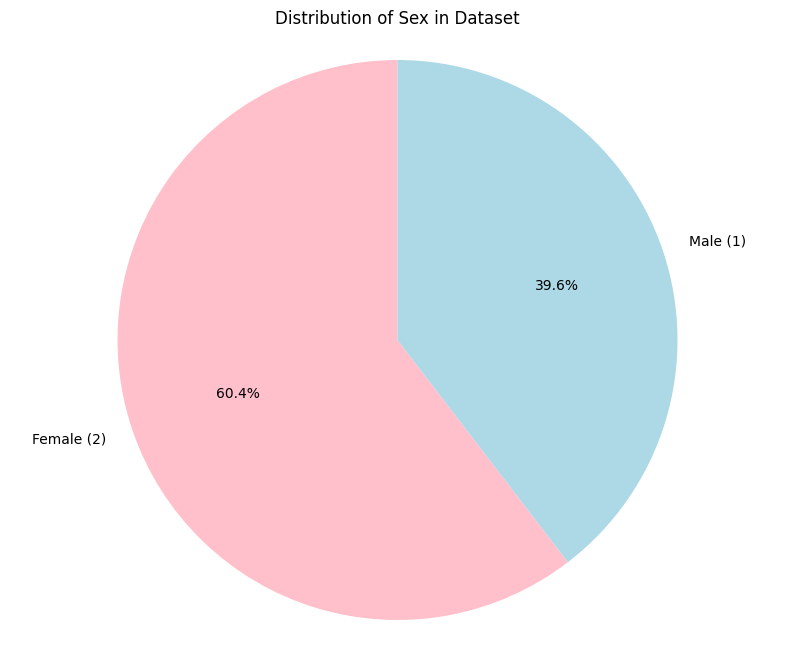

In [ ]:
# Show distribution of SEX feature
counts = dataset['SEX'].value_counts()

print(f"Male: {counts[1]}")
print(f"Female: {counts[2]}")

# Create a pie chart
plt.figure(figsize=(10, 8))
colors = ['pink', 'lightblue']
labels = ['Female (2)', 'Male (1)']

plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sex in Dataset')
plt.axis('equal')

# Show the plot
plt.show()

#### Feature "EDUCATION"

In [ ]:
# Show the values of the EDUCATION feature
dataset['EDUCATION'].value_counts().sort_index()

,count
EDUCATION,
0,13
1,8976
2,11971
3,4162
4,105
5,227
6,46


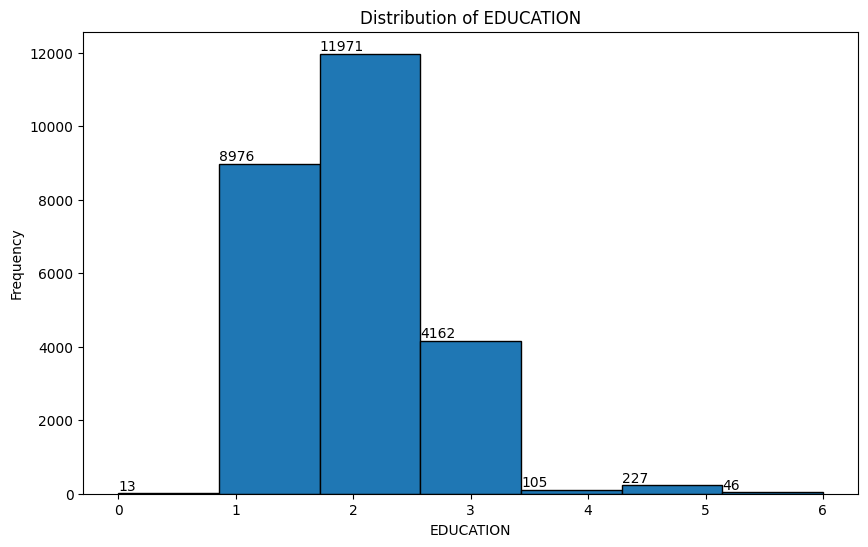

In [ ]:
# Plot the distribution of 'EDUCATION'
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(dataset['EDUCATION'], bins=7, edgecolor='black')

plt.title('Distribution of EDUCATION')
plt.xlabel('EDUCATION')
plt.ylabel('Frequency')

# Add frequency labels on top of each bar
for count, x in zip(n, bins):
    plt.text(x, count, str(int(count)), ha='left', va='bottom')

plt.show()

EDUCATION: 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown

There are some 0 values, which will need to be addressed.

Also, the unknown classes 5 and 6 are very few, so to limit the unbalance this could be adressed.

#### Feature "MARRIAGE"

In [ ]:
# Show the values of the MARRIAGE feature
dataset['MARRIAGE'].value_counts().sort_index()

,count
MARRIAGE,
0,49
1,11647
2,13524
3,280


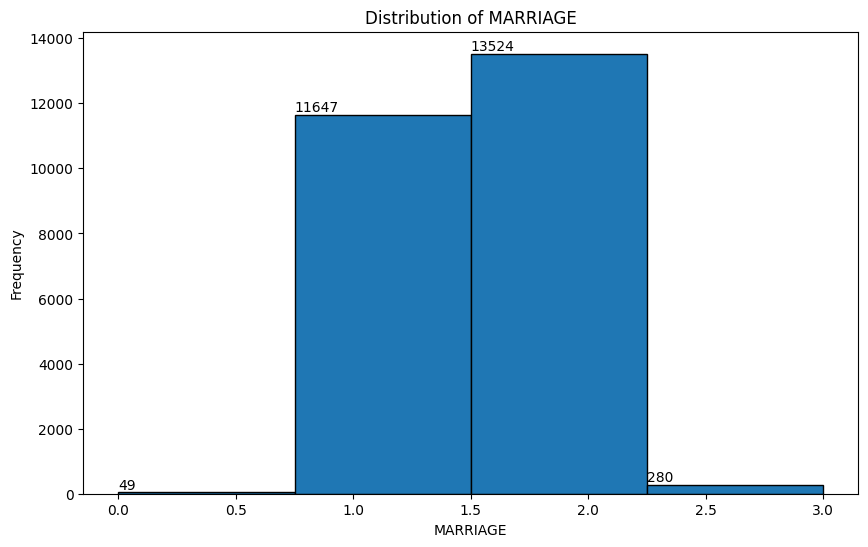

In [ ]:
# Plot the distribution of 'MARRIAGE'
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(dataset['MARRIAGE'], bins=4, edgecolor='black')

plt.title('Distribution of MARRIAGE')
plt.xlabel('MARRIAGE')
plt.ylabel('Frequency')

# Add frequency labels on top of each bar
for count, x in zip(n, bins):
    plt.text(x, count, str(int(count)), ha='left', va='bottom')

plt.show()

MARRIAGE: Marital status (1=married, 2=single, 3=others)

There are some 0 values (outside of the given range), this will have to be adressed

The number of "others" instances is very low so this could also be adressed to reduce the unbalance of the data

#### Feature "AGE"

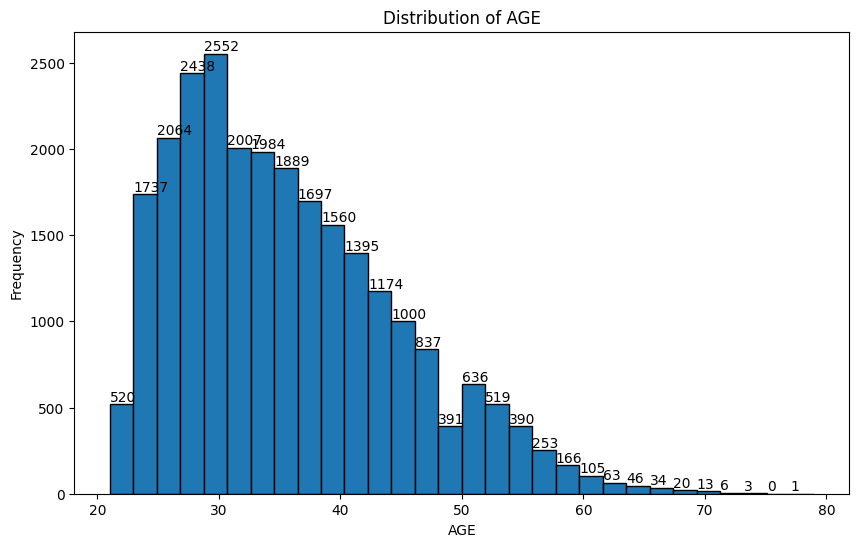

In [ ]:
# Plot the distribution of 'AGE'
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(dataset['AGE'], bins=30, edgecolor='black')

plt.title('Distribution of AGE')
plt.xlabel('AGE')
plt.ylabel('Frequency')

# Add frequency labels on top of each bar
for count, x in zip(n, bins):
    plt.text(x, count, str(int(count)), ha='left', va='bottom')

plt.show()

This feature is also not very well distributed

#### Features: repayment statuses

In [ ]:
# Show the values of the repayment statuses
repayment_statuses = dataset[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].melt()

# Count occurrences of each value across all features
repayment_statuses['value'].value_counts().sort_index()

,count
value,
-2,20595
-1,29533
0,81492
1,3168
2,16188
3,1221
4,396
5,129
6,68


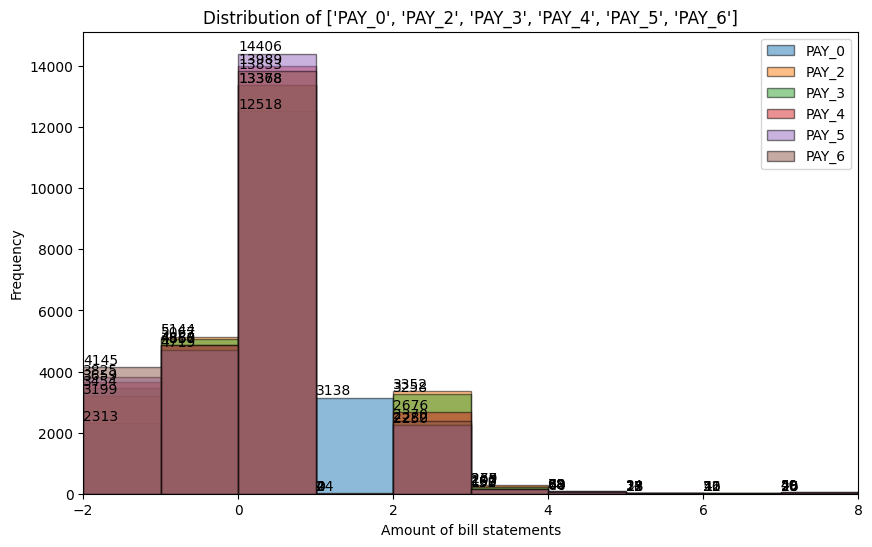

In [ ]:
# Plot the distribution of '['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']'

columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
min_val = min(dataset[columns].min())
max_val = max(dataset[columns].max())

plt.figure(figsize=(10, 6))
for col in columns:
    n, bins, patches = plt.hist(dataset[col], bins=10, alpha=0.5, label=col, edgecolor='black')

    # Add frequency labels on top of each bar
    for count, x in zip(n, bins[:-1]):  # bins[:-1] aligns labels with bin centers
        plt.text(x, count, str(int(count)), ha='left', va='bottom')

plt.title("Distribution of ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']")
plt.xlabel('Amount of bill statements')
plt.ylabel('Frequency')
plt.legend()

plt.xlim(min_val, max_val)

plt.show()


PAY_*: Repayment status over the months (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

However, the actual distribution ranges from -2 to 8. Shifting them to fit the description is a possibility.

On the other hand, if we consider the data after the shift, we would have data with a value of 9 (8 before the shift), that is outside of the given range. This will have to be adressed. Also, the number of instances where the data is above 4 (without shifting) is very small, so this could be adressed to reduce the unbalance.

#### Features: bill statements



In [ ]:
# Description of the bill statements
dataset[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,25500.000000,25500.000000,2.550000e+04,25500.000000,25500.000000,25500.000000
mean,51305.145216,49148.635098,4.700945e+04,43336.952196,40307.121059,38924.328157
std,73850.835175,71133.771077,6.952709e+04,64433.082446,60870.691089,59659.509920
min,-154973.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3594.750000,2996.500000,2.663750e+03,2338.750000,1767.250000,1266.750000
50%,22352.500000,21165.000000,2.009350e+04,19111.000000,18112.500000,17150.000000
75%,67062.000000,63824.750000,5.993250e+04,54475.000000,50178.250000,49132.500000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


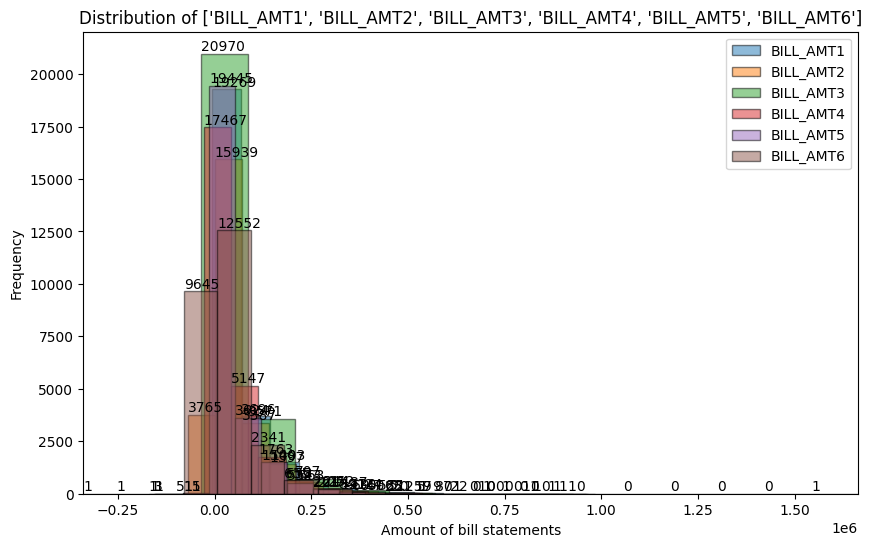

In [ ]:
# Plot the distribution of '['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']'

columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
min_val = min(dataset[columns].min())
max_val = max(dataset[columns].max())

plt.figure(figsize=(10, 6))
for col in columns:
    n, bins, patches = plt.hist(dataset[col], bins=15, alpha=0.5, label=col, edgecolor='black')

    # Add frequency labels on top of each bar
    for count, x in zip(n, bins[:-1]):  # bins[:-1] aligns labels with bin centers
        plt.text(x, count, str(int(count)), ha='left', va='bottom')

plt.title("Distribution of ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']")
plt.xlabel('Amount of bill statements')
plt.ylabel('Frequency')
plt.legend()

plt.xlim(min_val, max_val)

plt.show()

BILL_AMT*: Amount of bill statements throughout the months (it's the amounts owned by each client on their account).

There are some outliers that need to be taken care of. THe distribution is really bad, as is.

#### Features: previous payments

In [ ]:
# Description of the previous payments
dataset[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,25500.000000,2.550000e+04,25500.000000,25500.000000,25500.000000,25500.000000
mean,5594.010863,5.934389e+03,5319.529647,4812.161373,4812.480431,5236.509176
std,16235.253410,2.381277e+04,18157.653215,15560.524538,15206.108094,17958.888070
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.270000e+02,396.000000,291.000000,251.000000,125.750000
50%,2100.000000,2.002000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4560.500000,4000.000000,4071.500000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


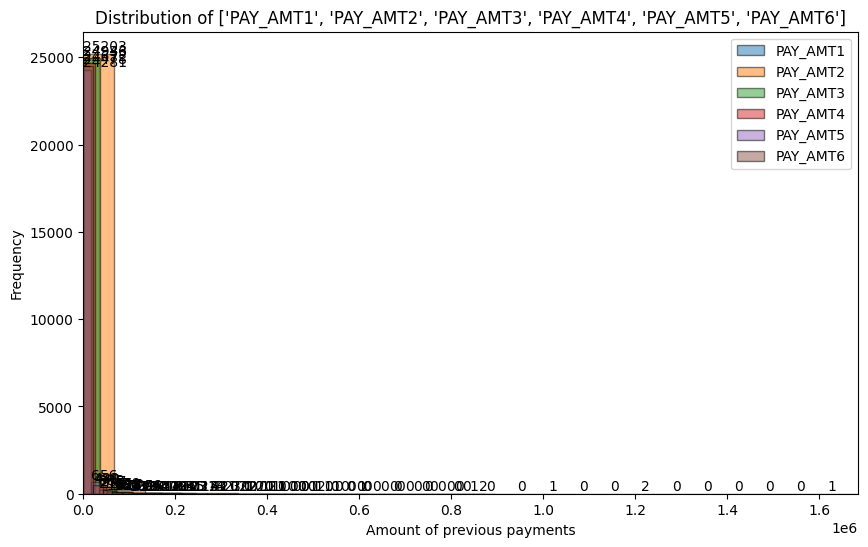

In [ ]:
# Plot the distribution of '['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']'

columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
min_val = min(dataset[columns].min())
max_val = max(dataset[columns].max())

plt.figure(figsize=(10, 6))
for col in columns:
    n, bins, patches = plt.hist(dataset[col], bins=25, alpha=0.5, label=col, edgecolor='black')

    # Add frequency labels on top of each bar
    for count, x in zip(n, bins[:-1]):  # bins[:-1] aligns labels with bin centers
        plt.text(x, count, str(int(count)), ha='left', va='bottom')

plt.title("Distribution of ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']")
plt.xlabel('Amount of previous payments')
plt.ylabel('Frequency')
plt.legend()

plt.xlim(min_val, max_val)

plt.show()

PAY_AMT**: Amount of previous payments throughout the months.

There are some outliers that need to be taken care of. The distribution needs to be fixed.

### Distributions (relatively to the target)

#### Distributions of "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE" and "AGE"

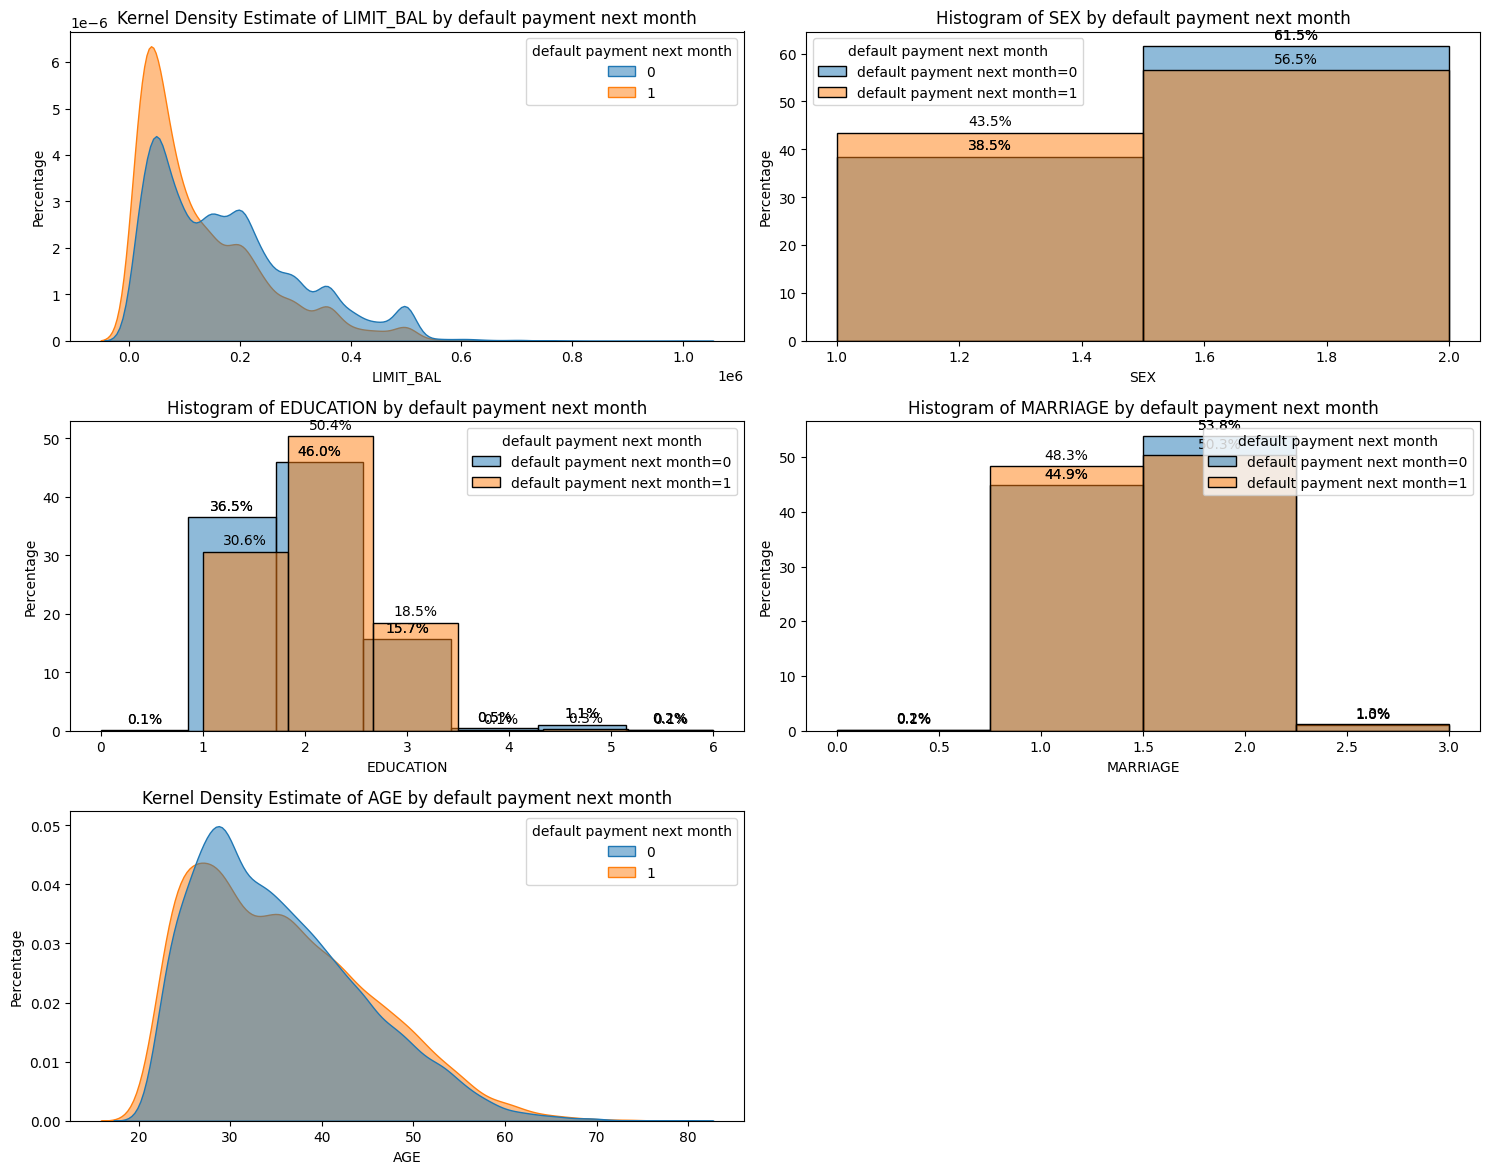

In [ ]:
import seaborn as sns

variables = ["LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE"]
target = "default payment next month"

# Create a grid of plots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()  # Flatten the 2D array of axes

# Loop through the variables and create the plots
for i, var in enumerate(variables):
    if var in ["LIMIT_BAL", "AGE"]:
        # Create a KDE plot for LIMIT_BAL and AGE
        sns.kdeplot(
            data=dataset,
            x=var,
            hue=target,
            multiple="layer",  # Overlay the two KDEs instead of stacking
            ax=axes[i],
            fill=True,
            alpha=0.5,
            common_norm=False  # Separate normalization for each class
        )
        axes[i].set_title(f'Kernel Density Estimate of {var} by {target}')
    else:
        # Create separate histograms for each class for categorical variables
        for cls in dataset[target].unique():
            subset = dataset[dataset[target] == cls]
            hist_plot = sns.histplot(
                data=subset,
                x=var,
                ax=axes[i],
                kde=False,
                bins=subset[var].nunique(),
                alpha=0.5,
                stat="percent",  # Percentage within each class
                label=f'{target}={cls}'
            )

            # Add values on top of each bar
            for container in hist_plot.containers:
                hist_plot.bar_label(container, fmt='%.1f%%', label_type="edge", padding=3)

        axes[i].legend(title=target)
        axes[i].set_title(f'Histogram of {var} by {target}')

    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Percentage')

# Remove the empty subplot (6th subplot)
fig.delaxes(axes[-1])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Although the number of instances for each class are unbalanced, the distribution across other features is somewhat similar.

Here are some observations from these plots:

LIM_BAL: people with a low limit on their balance seem to default more.

SEX: Men seem to default more than women

EDUCATION: People with lower levels of education (higher values) seem to default more.

MARRIAGE: Married people seem to default more.

AGE: People with age between 25 and 40 seem to default less.

#### Distributions of repayment statuses

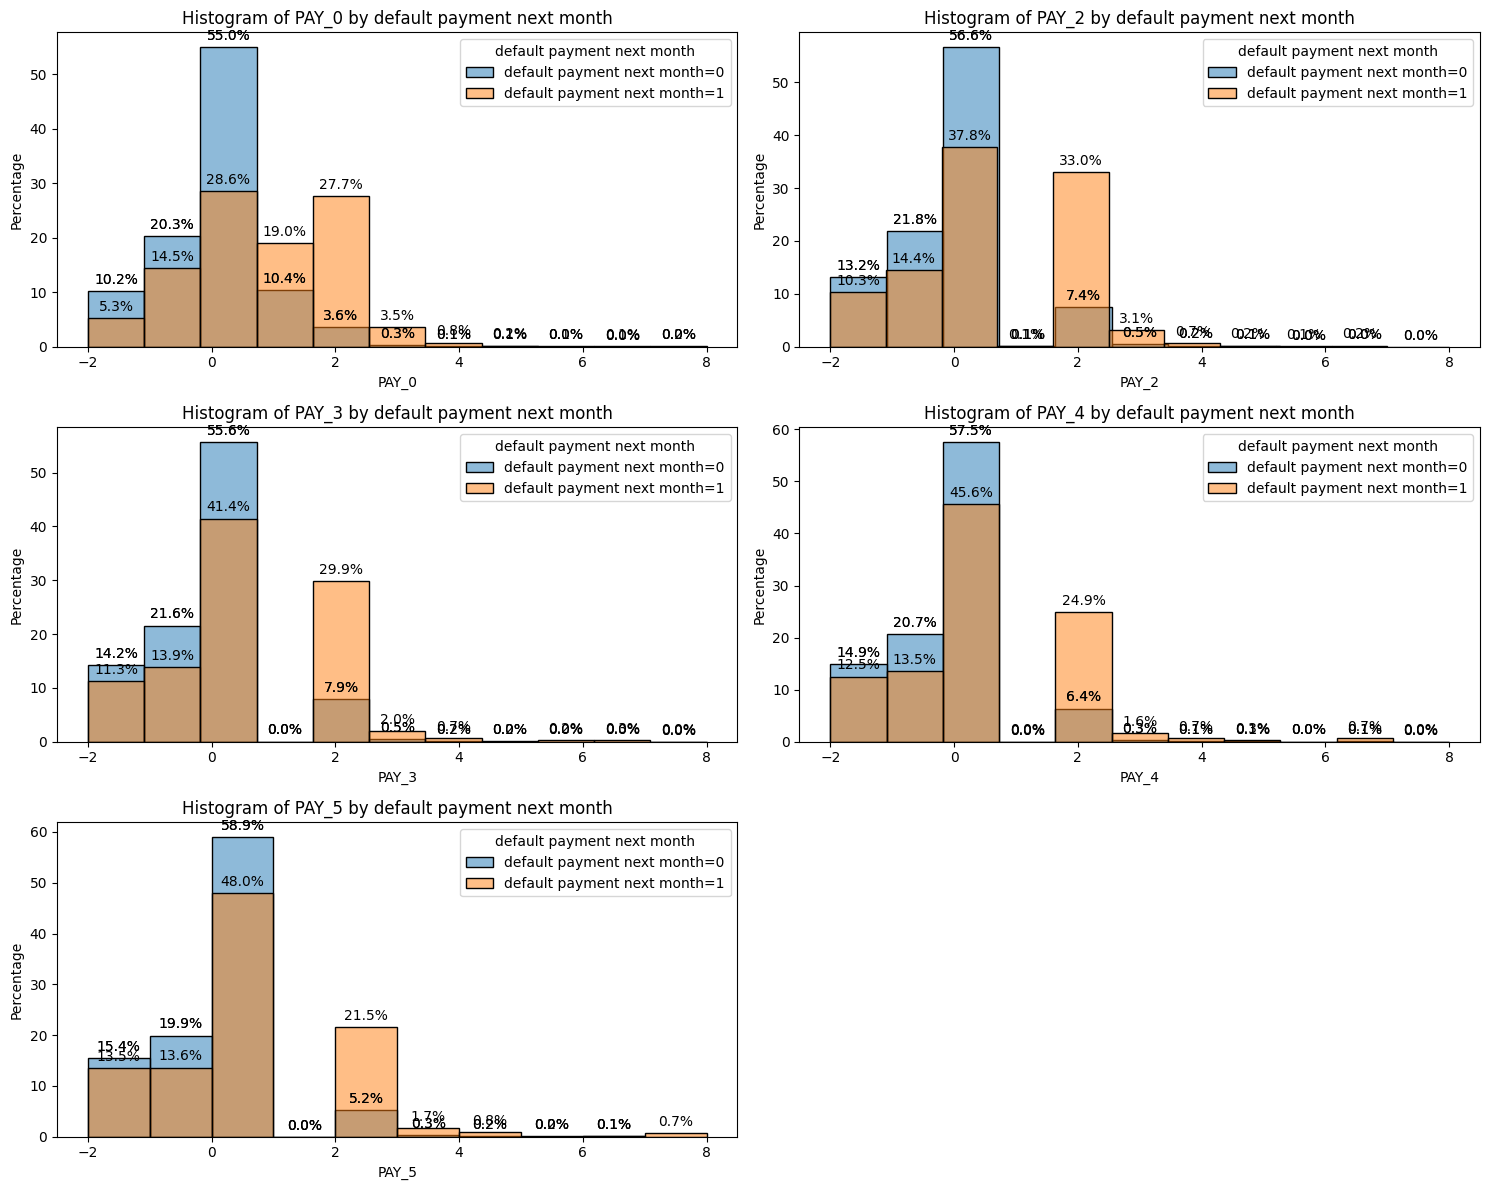

In [ ]:
variables = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
target = "default payment next month"

# Create a grid of plots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()  # Flatten the 2D array of axes

# Loop through the variables and create the plots
for i, var in enumerate(variables):

    # Create separate histograms for each class for categorical variables
    for cls in dataset[target].unique():
        subset = dataset[dataset[target] == cls]
        hist_plot = sns.histplot(
            data=subset,
            x=var,
            ax=axes[i],
            kde=False,
            bins=subset[var].nunique(),
            alpha=0.5,
            stat="percent",  # Percentage within each class
            label=f'{target}={cls}'
        )

        # Add values on top of each bar
        for container in hist_plot.containers:
            hist_plot.bar_label(container, fmt='%.1f%%', label_type="edge", padding=3)

        axes[i].legend(title=target)
        axes[i].set_title(f'Histogram of {var} by {target}')

    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Percentage')

# Remove the empty subplot (6th subplot)
fig.delaxes(axes[-1])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Here it's quite clear how the more a person is delaying the payments, the higher is the chance of defaulting

One column is mislabeled, PAY_0 should be PAY_1. However, this is only an issue for the presentation of the data.

#### Distributions of bill statements



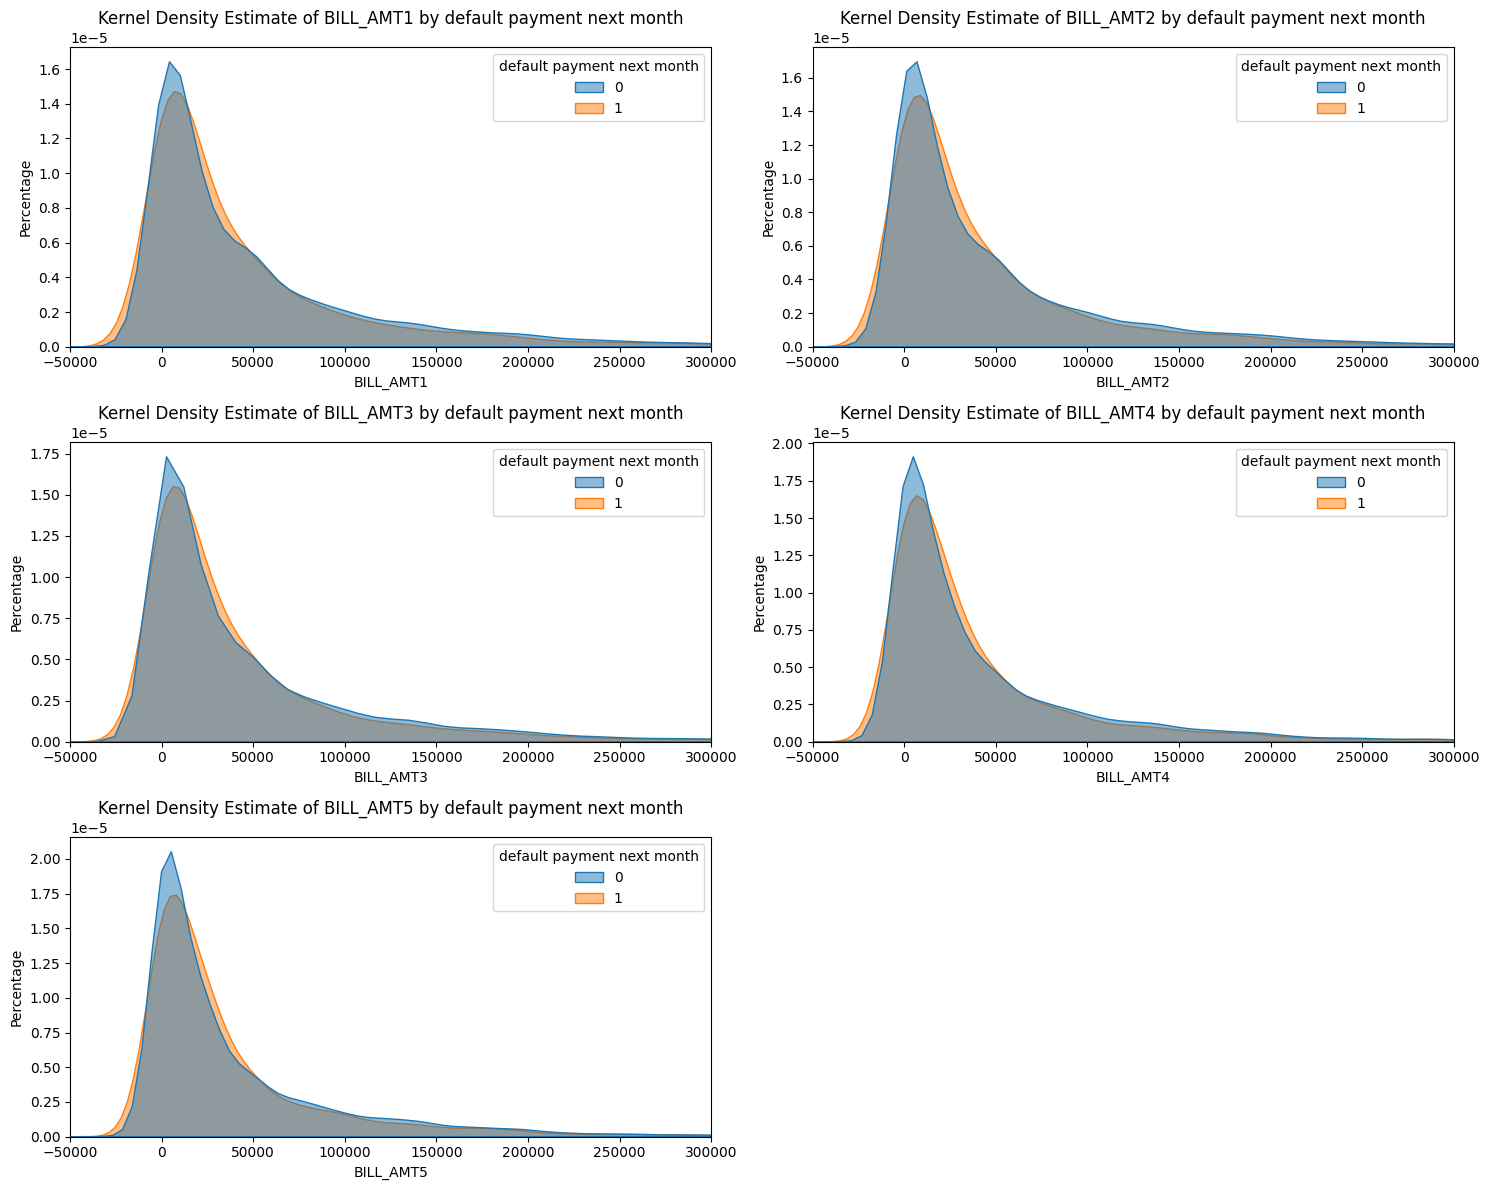

In [ ]:
variables = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
target = "default payment next month"

# Create a grid of plots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()  # Flatten the 2D array of axes

# Loop through the variables and create the plots
for i, var in enumerate(variables):
    sns.kdeplot(
        data=dataset,
        x=var,
        hue=target,
        multiple="layer",  # Overlay the two KDEs instead of stacking
        ax=axes[i],
        fill=True,
        alpha=0.5,
        common_norm=False  # Separate normalization for each class
    )
    axes[i].set_title(f'Kernel Density Estimate of {var} by {target}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Percentage')
    axes[i].set_xlim(-50000,300000) # Limit x axis for better visualization

# Remove the empty subplot (6th subplot)
fig.delaxes(axes[-1])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


#### Distributions of previous payments

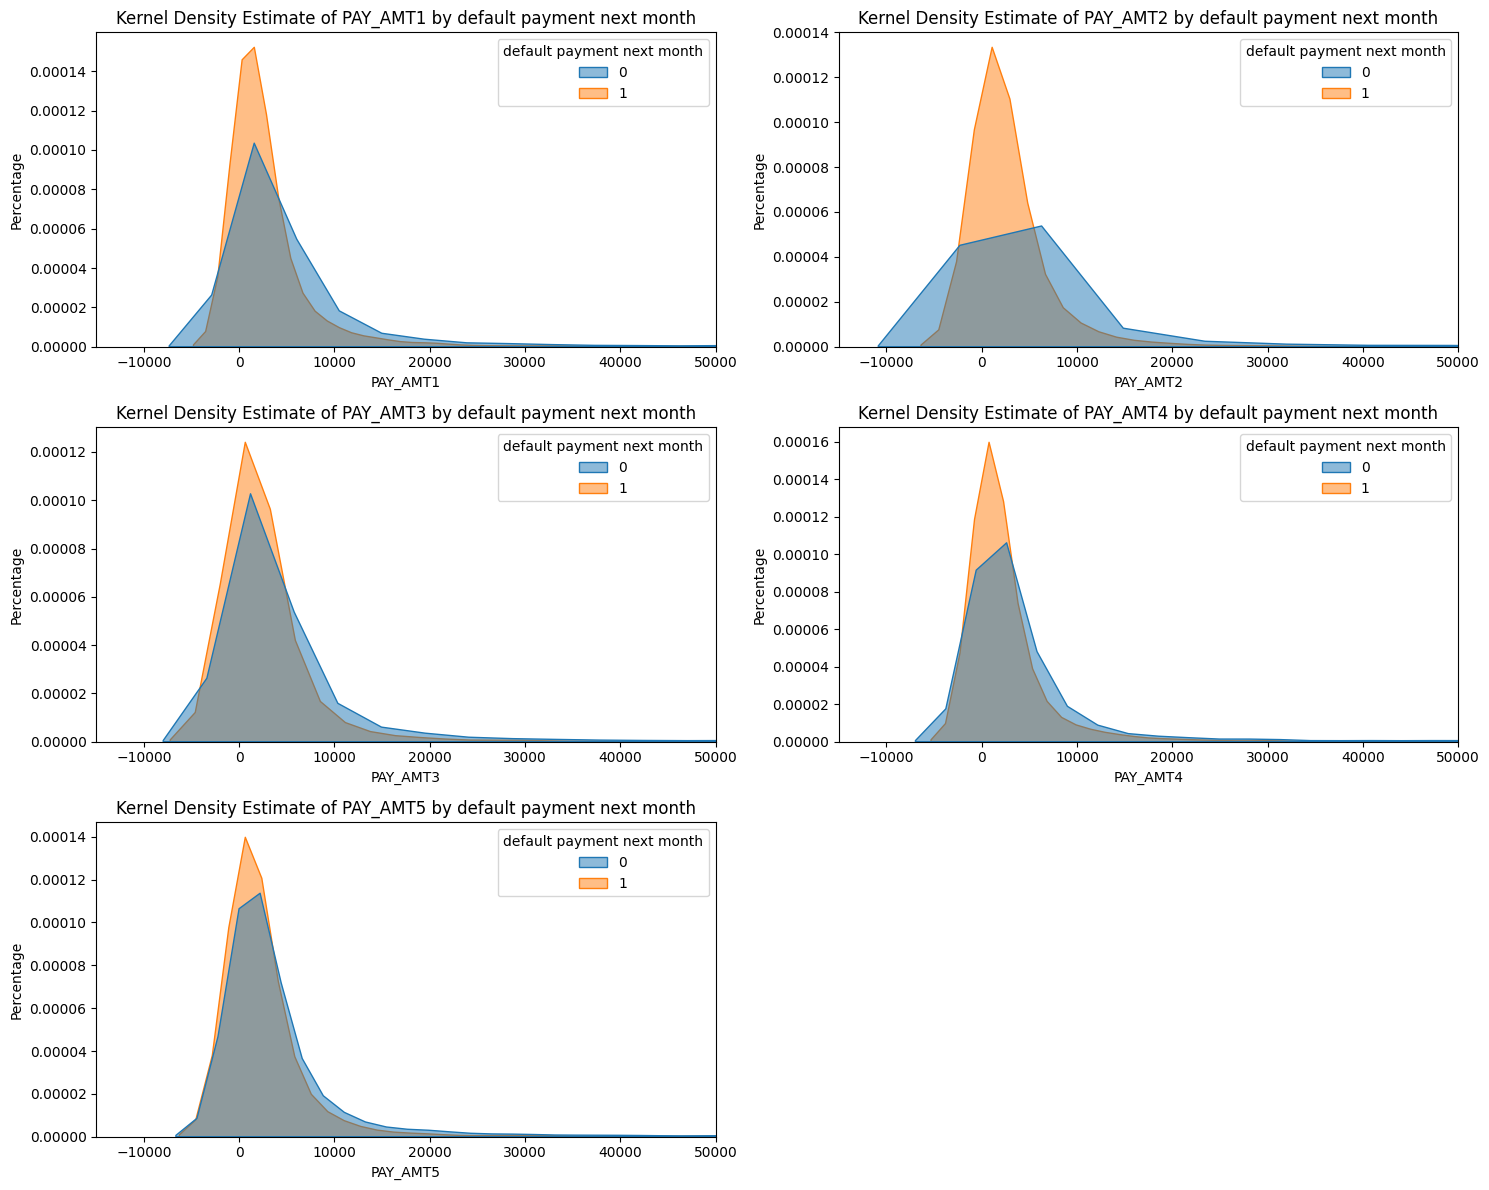

In [ ]:
variables = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
target = "default payment next month"

# Create a grid of plots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()  # Flatten the 2D array of axes

# Loop through the variables and create the plots
for i, var in enumerate(variables):
    sns.kdeplot(
        data=dataset,
        x=var,
        hue=target,
        multiple="layer",  # Overlay the two KDEs instead of stacking
        ax=axes[i],
        fill=True,
        alpha=0.5,
        common_norm=False  # Separate normalization for each class
    )
    axes[i].set_title(f'Kernel Density Estimate of {var} by {target}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Percentage')
    axes[i].set_xlim(-15000,50000) # Limit x axis for better visualization

# Remove the empty subplot (6th subplot)
fig.delaxes(axes[-1])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


it seems like people that have more previous payments tend to default less.

For this feature, and the previous BILL_AMT* I have interpreted negative values as possible corrections due to overpayments in the previous months, adjustments, refunds... given the large amount of negative values I do not believe that they're wrong values that need to be corrected, but they probably just represent corrections or credit of some sort.

### Correlations

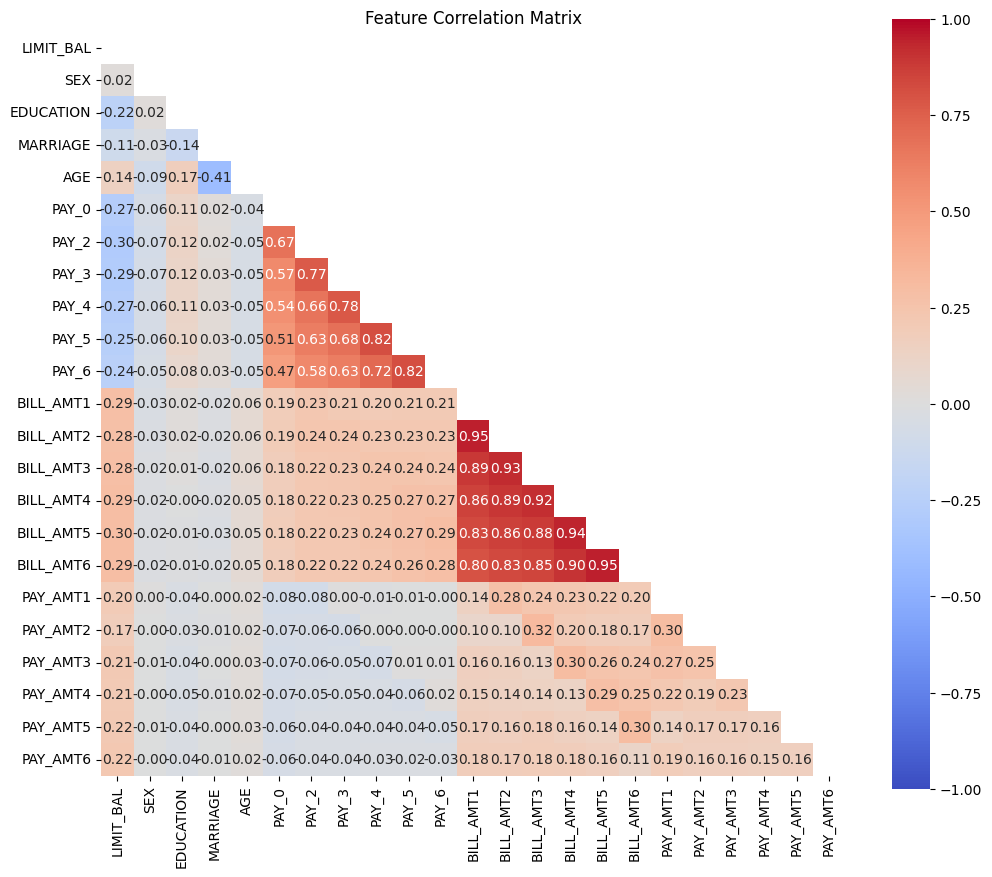

In [ ]:
import numpy as np

# Calculate the correlation matrix
correlation_matrix = dataset.corr()
correlation_matrix = correlation_matrix.iloc[1:-1, 1:-1] # Exlude the first and last feature

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the figure and plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True,
            vmin=-1, vmax=1, mask=mask)  # Set color scale from -1 to 1 and set the mask
# Show the plot
plt.title("Feature Correlation Matrix")
plt.show()

From this correlation matrix we can clearly see:

- There is a very high correlation between BILL_AMT* (amount of bill statements), especially between the value of one month and the value of the following month. This is a singal of a possible redundancy in the data.

- There is a moderately high correlation between PAY_* features, especially between the value of one month and the value of the following month.

- There is a moderately high correlation between AGE and MARRIAGE.

- There is a small correlation between LIMIT_BAL and almost every other feature.

## Preparing the data

describe the choice made during the preprocessing operations, also taking into account the previous considerations during the data inspection.

### * Deleting and reshaping instances

#### Preparing LIMIT_BAL

Removing all the instances where LIMIT_BAL is above 500'000, to remove the outliers make the feature more balanced
On the test set instead, they're moved to 500'000

In [ ]:
# Count values above 500,000
count_above_500k = dataset['LIMIT_BAL'][dataset['LIMIT_BAL'] > 500000].count()

# Total count of values in LIMIT_BAL
total_count = dataset['LIMIT_BAL'].count()

# Calculate the percentage
percentage_above_500k = (count_above_500k / total_count) * 100
print(f"Percentage of values above 500,000: {percentage_above_500k:.2f}%")

Percentage of values above 500,000: 0.69%


In [ ]:
# Filter out rows where LIMIT_BAL is above 500,000
dataset = dataset[dataset['LIMIT_BAL'] <= 500000]
# Set values above 500,000 to 500,000 in X_test
X_test['LIMIT_BAL'] = X_test['LIMIT_BAL'].apply(lambda x: 500000 if x > 500000 else x)

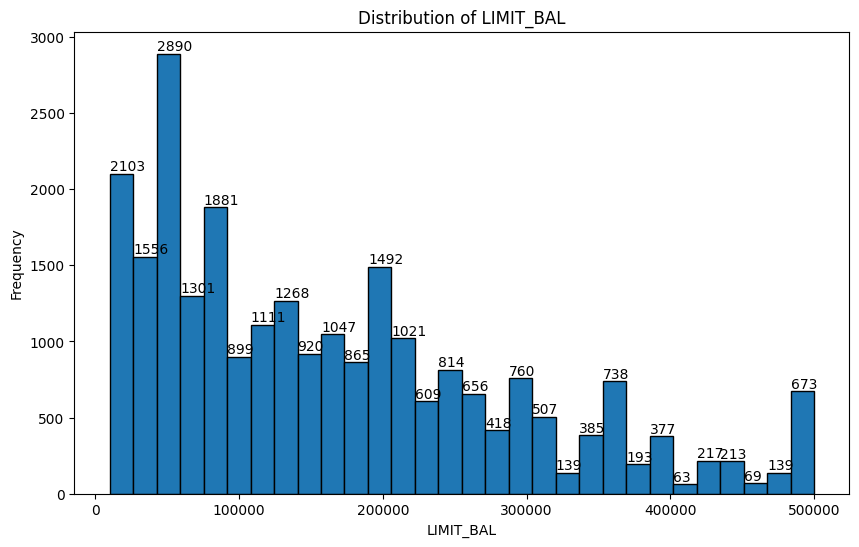

In [ ]:
# Plot the distribution of 'LIMIT_BAL'
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(dataset['LIMIT_BAL'], bins=30, edgecolor='black')

plt.title('Distribution of LIMIT_BAL')
plt.xlabel('LIMIT_BAL')
plt.ylabel('Frequency')

# Add frequency labels on top of each bar
for count, x in zip(n, bins):
    plt.text(x, count, str(int(count)), ha='left', va='bottom')

plt.show()

#### Preparing EDUCATION

In [ ]:
dataset['EDUCATION'].value_counts().sort_index()

,count
EDUCATION,
0,13
1,8874
2,11923
3,4141
4,103
5,225
6,45


I decided to remove the class 0, considering those instances errors (this is fine, and better than risking errors by changing the value, since it's only a few instances). In the test set, these are moved to the class 4.

Class 5 and 6 are moved to class 4, to reduce the unbalance of the feature.

In [ ]:
dataset = dataset[dataset['EDUCATION'] != 0] # Removes the instances where EDUCATION is 0
X_test.loc[X_test['EDUCATION'].isin([0]), 'EDUCATION'] = 4 # Moves the test instances to 4 (others)

In [ ]:
dataset.loc[dataset['EDUCATION'].isin([5, 6]), 'EDUCATION'] = 4 # Groups the value 5 (unknown) and 6 (unknown) into 4 (others)
X_test.loc[X_test['EDUCATION'].isin([5, 6]), 'EDUCATION'] = 4
dataset['EDUCATION'].value_counts().sort_index()

<ipython-input-205-e4be8b3e3f82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[dataset['EDUCATION'].isin([5, 6]), 'EDUCATION'] = 4 # Groups the value 5 (unknown) and 6 (unknown) into 4 (others)


,count
EDUCATION,
1,8874
2,11923
3,4141
4,373


#### Preparing MARRIAGE

In [ ]:
dataset['MARRIAGE'].value_counts().sort_index()

,count
MARRIAGE,
0,49
1,11558
2,13424
3,280


I decided to remove the class 0, since it's undocumented and could be an error, just like in the EDUCATION feature. I also removed the class 3, to try to reduce the unbalance.

In [ ]:
X_test.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,15247.243556,166422.222222,1.601556,1.844444,1.560222,35.350667,-0.037111,-0.150667,-0.182667,-0.234444,...,47034.155778,42843.597333,40335.653778,38573.876444,6057.808444,5846.221111,4693.875333,4904.931333,4725.195111,5096.465111
std,8617.590865,126436.443368,0.489632,0.754789,0.517461,9.316311,1.109357,1.184084,1.180701,1.166097,...,68341.327500,63767.417044,60385.484596,58958.957529,18308.415030,18055.862079,14075.304321,16253.353349,15682.668354,16713.648086
min,12.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-15000.000000,-15000.000000,-15000.000000,-150953.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7894.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2688.000000,2276.250000,1744.000000,1150.000000,928.750000,883.000000,380.000000,306.750000,256.000000,88.000000
50%,15248.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,20036.000000,18699.000000,18088.500000,16437.500000,2121.000000,2115.500000,1800.000000,1580.000000,1511.500000,1500.000000
75%,22802.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,61111.250000,54757.250000,50264.250000,49258.500000,5009.500000,5000.000000,4241.250000,4200.000000,4000.000000,4000.000000
max,29987.000000,500000.000000,2.000000,4.000000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,...,548020.000000,530672.000000,486721.000000,527566.000000,505000.000000,401003.000000,417588.000000,432130.000000,417990.000000,278311.000000


In [ ]:
dataset = dataset[dataset['MARRIAGE'] != 0] # Removes the instances where MARRIAGE is 0
dataset = dataset[dataset['MARRIAGE'] != 3] # Removes the instances where MARRIAGE is 3
#X_test.loc[X_test['MARRIAGE'].isin([0]), 'MARRIAGE'] = 3 # Moves the test instances to 3 (others)
dataset['MARRIAGE'].value_counts().sort_index()

,count
MARRIAGE,
1,11558
2,13424


#### Preparing AGE

I have compressed all the ages above 60 to 60, to reduce the distribution

In [ ]:
# Count values above 60
count_above_60 = dataset['AGE'][dataset['AGE'] > 60].count()

# Total count of values in AGE
total_count = dataset['AGE'].count()

# Calculate the percentage
percentage_above_60 = (count_above_60 / total_count) * 100
print(f"Percentage of values above 60: {percentage_above_60:.2f}%")

Percentage of values above 60: 0.92%


In [ ]:
# Set values above 60 to 60
dataset['AGE'] = dataset['AGE'].apply(lambda x: 60 if x > 60 else x)
X_test['AGE'] = X_test['AGE'].apply(lambda x: 60 if x > 60 else x)

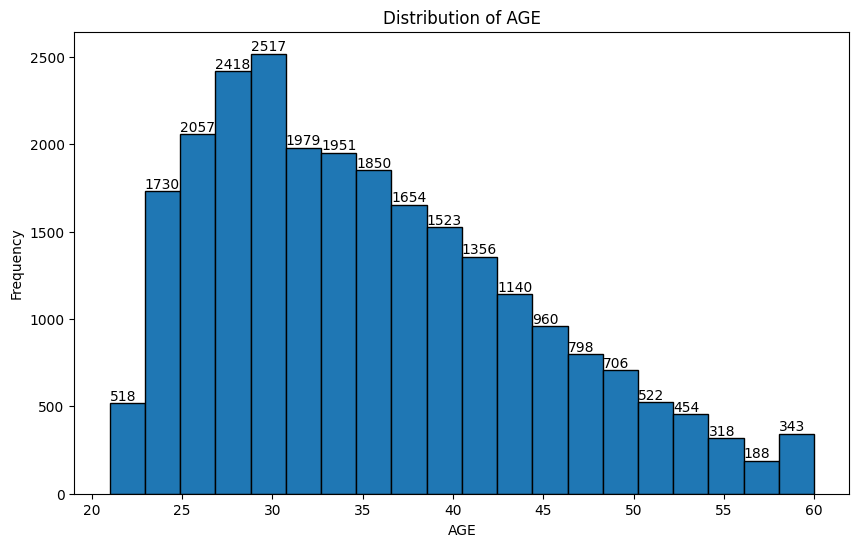

In [ ]:
# Plot the distribution of 'AGE'
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(dataset['AGE'], bins=20, edgecolor='black')

plt.title('Distribution of AGE')
plt.xlabel('AGE')
plt.ylabel('Frequency')

# Add frequency labels on top of each bar
for count, x in zip(n, bins):
    plt.text(x, count, str(int(count)), ha='left', va='bottom')

plt.show()

#### Preparing repayment statuses

I have grouped up all the payment statuses above 3 into 3, to reduce the distribution, since the values are correlated and very few.



In [ ]:
# Melt the repayment status columns into a single column
repayment_statuses = dataset[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].melt()

# Count the total number of repayment status values
total_count = repayment_statuses['value'].count()

# Count the number of values greater than 4
count_above_2 = repayment_statuses['value'][repayment_statuses['value'] >= 3].count()

# Calculate the percentage of values above 4
percentage_above_2 = (count_above_2 / total_count) * 100
print(f"Percentage of values above 2: {percentage_above_2:.2f}%")

Percentage of values above 2: 1.32%


In [ ]:
dataset[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] = dataset[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].map(lambda x: 2 if x > 2 else x)
X_test[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] = X_test[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].map(lambda x: 2 if x > 2 else x)

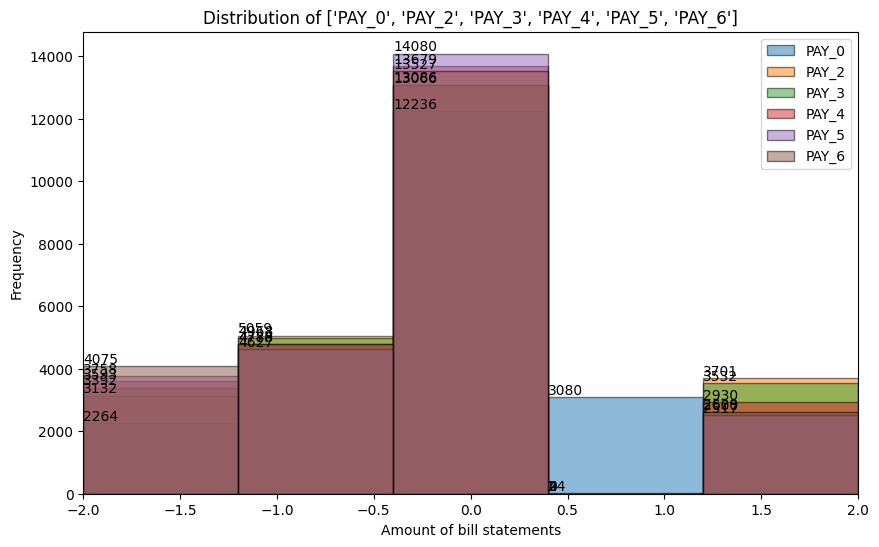

In [ ]:
# Plot the distribution of '['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']'

columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
min_val = min(dataset[columns].min())
max_val = max(dataset[columns].max())

plt.figure(figsize=(10, 6))
for col in columns:
    n, bins, patches = plt.hist(dataset[col], bins=5, alpha=0.5, label=col, edgecolor='black')

    # Add frequency labels on top of each bar
    for count, x in zip(n, bins[:-1]):  # bins[:-1] aligns labels with bin centers
        plt.text(x, count, str(int(count)), ha='left', va='bottom')

plt.title("Distribution of ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']")
plt.xlabel('Amount of bill statements')
plt.ylabel('Frequency')
plt.legend()

plt.xlim(min_val, max_val)

plt.show()

#### Preparing bill statements


I have grouped up all the bill statements above 300'000, to reduce the distribution, since the values are correlated and very few.


In [ ]:
# Melt the billing amount columns into a single column
billing_amounts = dataset[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].melt()

# Count the total number of billing amount values
total_count_bills = billing_amounts['value'].count()

# Count the number of values greater than 300,000
count_above_300k = billing_amounts['value'][billing_amounts['value'] > 300000].count()

# Calculate the percentage of values above 300,000
percentage_above_300k = (count_above_300k / total_count_bills) * 100

print(f"Percentage of bill statements above 300,000: {percentage_above_300k:.2f}%")

Percentage of bill statements above 300,000: 1.07%


In [ ]:
columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
dataset[columns] = dataset[columns].map(lambda x: 300000 if x > 300000 else x)
X_test[columns] = X_test[columns].map(lambda x: 300000 if x > 300000 else x)

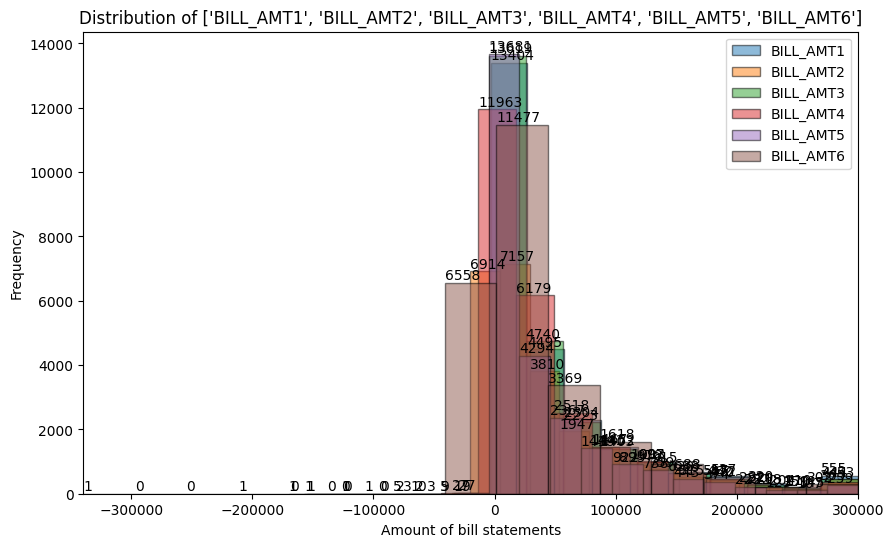

In [ ]:
# Plot the distribution of '['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']'

columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
min_val = min(dataset[columns].min())
max_val = max(dataset[columns].max())

plt.figure(figsize=(10, 6))
for col in columns:
    n, bins, patches = plt.hist(dataset[col], bins=15, alpha=0.5, label=col, edgecolor='black')

    # Add frequency labels on top of each bar
    for count, x in zip(n, bins[:-1]):  # bins[:-1] aligns labels with bin centers
        plt.text(x, count, str(int(count)), ha='left', va='bottom')

plt.title("Distribution of ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']")
plt.xlabel('Amount of bill statements')
plt.ylabel('Frequency')
plt.legend()

plt.xlim(min_val, max_val)

plt.show()

In [ ]:
# Count the total number of billing amount values
total_count_bills = billing_amounts['value'].count()

# Count the number of values lesser than -5000
count_under_neg5k = billing_amounts['value'][billing_amounts['value'] < -5000].count()

# Calculate the percentage of values under -5000
percentage_under_neg5k = (count_under_neg5k / total_count_bills) * 100

print(f"Percentage of bill statements above -5000: {percentage_under_neg5k:.2f}%")

Percentage of bill statements above -5000: 0.11%


In [ ]:
columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
dataset[columns] = dataset[columns].map(lambda x: -5000 if x < -5000 else x)
X_test[columns] = X_test[columns].map(lambda x: -5000 if x < -5000 else x)

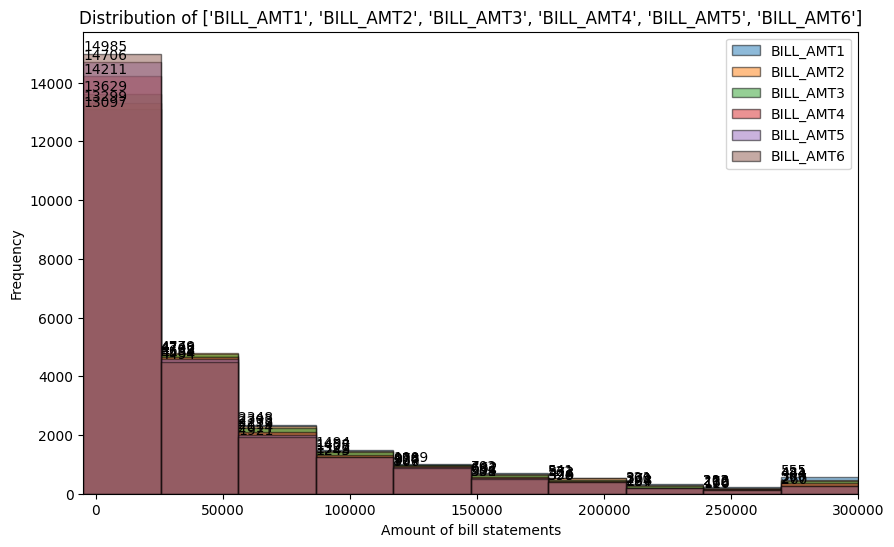

In [ ]:
# Plot the distribution of '['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']'

columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
min_val = min(dataset[columns].min())
max_val = max(dataset[columns].max())

plt.figure(figsize=(10, 6))
for col in columns:
    n, bins, patches = plt.hist(dataset[col], bins=10, alpha=0.5, label=col, edgecolor='black')

    # Add frequency labels on top of each bar
    for count, x in zip(n, bins[:-1]):  # bins[:-1] aligns labels with bin centers
        plt.text(x, count, str(int(count)), ha='left', va='bottom')

plt.title("Distribution of ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']")
plt.xlabel('Amount of bill statements')
plt.ylabel('Frequency')
plt.legend()

plt.xlim(min_val, max_val)

plt.show()

#### Preparing previous payments

I have grouped up all the previous payments above 21000, to reduce the distribution, since the values are correlated and very few.

In [ ]:
# Melt the billing amount columns into a single column
billing_amounts = dataset[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].melt()

# Count the total number of billing amount values
total_count_bills = billing_amounts['value'].count()

# Count the number of values greater than 300,000
count_above_300k = billing_amounts['value'][billing_amounts['value'] > 21000].count()

# Calculate the percentage of values above 300,000
percentage_above_300k = (count_above_300k / total_count_bills) * 100

print(f"Percentage of previous payments above 300,000: {percentage_above_300k:.2f}%")

Percentage of previous payments above 300,000: 3.78%


In [ ]:
columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
dataset[columns] = dataset[columns].map(lambda x: 21000 if x > 21000 else x)
X_test[columns] = X_test[columns].map(lambda x: 21000 if x > 21000 else x)

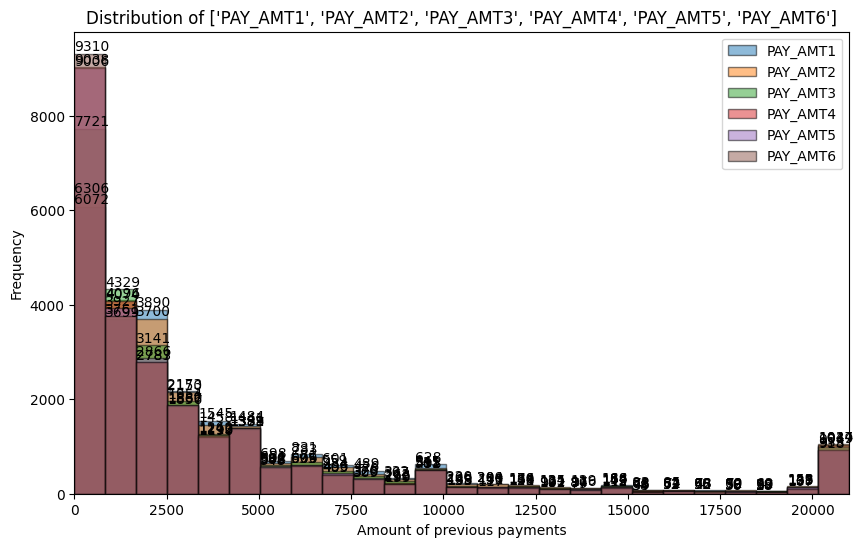

In [ ]:
# Plot the distribution of '['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']'

columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
min_val = min(dataset[columns].min())
max_val = max(dataset[columns].max())

plt.figure(figsize=(10, 6))
for col in columns:
    n, bins, patches = plt.hist(dataset[col], bins=25, alpha=0.5, label=col, edgecolor='black')

    # Add frequency labels on top of each bar
    for count, x in zip(n, bins[:-1]):  # bins[:-1] aligns labels with bin centers
        plt.text(x, count, str(int(count)), ha='left', va='bottom')

plt.title("Distribution of ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']")
plt.xlabel('Amount of previous payments')
plt.ylabel('Frequency')
plt.legend()

plt.xlim(min_val, max_val)

plt.show()

  ### Functions

Since clearly none of the features follow a gaussian curve, I chose to use a normalization, with MinMaxScaler, on the continuous features, and one-hot encoding on categorical features.

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def normalize_feature(X_train_feature, X_val_feature, X_test_feature):
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Combine the training, validation, and test features for normalization
    combined = pd.concat([X_train_feature, X_val_feature, X_test_feature], axis=0).values.reshape(-1, 1)

    # Fit the scaler on the combined data and transform it
    normalized_combined = scaler.fit_transform(combined)

    # Split back into the individual normalized datasets
    num_train = len(X_train_feature)
    num_val = len(X_val_feature)

    X_train_normalized = normalized_combined[:num_train].flatten()
    X_val_normalized = normalized_combined[num_train:num_train + num_val].flatten()
    X_test_normalized = normalized_combined[num_train + num_val:].flatten()

    return X_train_normalized, X_val_normalized, X_test_normalized

### *Preparing the features

In [ ]:
from sklearn.model_selection import train_test_split

target = "default payment next month"
X = dataset.drop(columns=[target]) # Features data
y = dataset[target]  # Target data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# ID Drops
X_train.drop(columns=['ID'], inplace=True)
X_val.drop(columns=['ID'], inplace=True)
X_test.drop(columns=['ID'], inplace=True)

#### Normalizing features

In [ ]:
# Normalizing LIMIT_BAL
X_train["LIMIT_BAL"], X_val["LIMIT_BAL"], X_test["LIMIT_BAL"] = normalize_feature(X_train["LIMIT_BAL"], X_val["LIMIT_BAL"], X_test["LIMIT_BAL"])

I decided to normalize AGE instead of one-hot encoding it, since it's a somewhat continuous feature, and the order of the values is important.

In [ ]:
# Normalizing AGE
X_train["AGE"], X_val["AGE"], X_test["AGE"] = normalize_feature(X_train["AGE"], X_val["AGE"], X_test["AGE"])

In [ ]:
# Normalizing PAY_0
X_train["PAY_0"], X_val["PAY_0"], X_test["PAY_0"] = normalize_feature(X_train["PAY_0"], X_val["PAY_0"], X_test["PAY_0"])
# Normalizing PAY_2
X_train["PAY_2"], X_val["PAY_2"], X_test["PAY_2"] = normalize_feature(X_train["PAY_2"], X_val["PAY_2"], X_test["PAY_2"])
# Normalizing PAY_3
X_train["PAY_3"], X_val["PAY_3"], X_test["PAY_3"] = normalize_feature(X_train["PAY_3"], X_val["PAY_3"], X_test["PAY_3"])
# Normalizing PAY_4
X_train["PAY_4"], X_val["PAY_4"], X_test["PAY_4"] = normalize_feature(X_train["PAY_4"], X_val["PAY_4"], X_test["PAY_4"])
# Normalizing PAY_5
X_train["PAY_5"], X_val["PAY_5"], X_test["PAY_5"] = normalize_feature(X_train["PAY_5"], X_val["PAY_5"], X_test["PAY_5"])
# Normalizing PAY_6
X_train["PAY_6"], X_val["PAY_6"], X_test["PAY_6"] = normalize_feature(X_train["PAY_6"], X_val["PAY_6"], X_test["PAY_6"])

I have decided to normalize PAY_* to keep the ordinal information about the possible values. Also, using a one-hot encoding for these features would create a lot of new columns, because they're 6 features, with 10 possible values, so it would create 60 new columns.

In [ ]:
# Normalizing BILL_AMT1
X_train["BILL_AMT1"], X_val["BILL_AMT1"], X_test["BILL_AMT1"] = normalize_feature(X_train["BILL_AMT1"], X_val["BILL_AMT1"], X_test["BILL_AMT1"])
# Normalizing BILL_AMT2
X_train["BILL_AMT2"], X_val["BILL_AMT2"], X_test["BILL_AMT2"] = normalize_feature(X_train["BILL_AMT2"], X_val["BILL_AMT2"], X_test["BILL_AMT2"])
# Normalizing BILL_AMT3
X_train["BILL_AMT3"], X_val["BILL_AMT3"], X_test["BILL_AMT3"] = normalize_feature(X_train["BILL_AMT3"], X_val["BILL_AMT3"], X_test["BILL_AMT3"])
# Normalizing BILL_AMT4
X_train["BILL_AMT4"], X_val["BILL_AMT4"], X_test["BILL_AMT4"] = normalize_feature(X_train["BILL_AMT4"], X_val["BILL_AMT4"], X_test["BILL_AMT4"])
# Normalizing BILL_AMT5
X_train["BILL_AMT5"], X_val["BILL_AMT5"], X_test["BILL_AMT5"] = normalize_feature(X_train["BILL_AMT5"], X_val["BILL_AMT5"], X_test["BILL_AMT5"])
# Normalizing BILL_AMT6
X_train["BILL_AMT6"], X_val["BILL_AMT6"], X_test["BILL_AMT6"] = normalize_feature(X_train["BILL_AMT6"], X_val["BILL_AMT6"], X_test["BILL_AMT6"])

In [ ]:
# Normalizing PAY_AMT1
X_train["PAY_AMT1"], X_val["PAY_AMT1"], X_test["PAY_AMT1"] = normalize_feature(X_train["PAY_AMT1"], X_val["PAY_AMT1"], X_test["PAY_AMT1"])
# Normmalizing PAY_AMT2
X_train["PAY_AMT2"], X_val["PAY_AMT2"], X_test["PAY_AMT2"] = normalize_feature(X_train["PAY_AMT2"], X_val["PAY_AMT2"], X_test["PAY_AMT2"])
# Normmalizing PAY_AMT3
X_train["PAY_AMT3"], X_val["PAY_AMT3"], X_test["PAY_AMT3"] = normalize_feature(X_train["PAY_AMT3"], X_val["PAY_AMT3"], X_test["PAY_AMT3"])
# Normmalizing PAY_AMT4
X_train["PAY_AMT4"], X_val["PAY_AMT4"], X_test["PAY_AMT4"] = normalize_feature(X_train["PAY_AMT4"], X_val["PAY_AMT4"], X_test["PAY_AMT4"])
# Normmalizing PAY_AMT5
X_train["PAY_AMT5"], X_val["PAY_AMT5"], X_test["PAY_AMT5"] = normalize_feature(X_train["PAY_AMT5"], X_val["PAY_AMT5"], X_test["PAY_AMT5"])
# Normmalizing PAY_AMT6
X_train["PAY_AMT6"], X_val["PAY_AMT6"], X_test["PAY_AMT6"] = normalize_feature(X_train["PAY_AMT6"], X_val["PAY_AMT6"], X_test["PAY_AMT6"])

####One-hot encoding features

I have decided to apply the one-hot encodings manually, and not with the sklearn library, to have more flexibility in how to apply it depending on the feature.

In [ ]:
# One-hot encoding SEX for X_train
X_train['MALE'] = (X_train['SEX'] == 1).astype('category')
X_train['FEMALE'] = (X_train['SEX'] == 2).astype('category')
X_train.drop('SEX', axis=1, inplace=True)
# One-hot encoding SEX for X_val
X_val['MALE'] = (X_val['SEX'] == 1).astype('category')
X_val['FEMALE'] = (X_val['SEX'] == 2).astype('category')
X_val.drop('SEX', axis=1, inplace=True)
# One-hot encoding SEX for X_test
X_test['MALE'] = (X_test['SEX'] == 1).astype('category')
X_test['FEMALE'] = (X_test['SEX'] == 2).astype('category')
X_test.drop('SEX', axis=1, inplace=True)

This way I am not only saying that the person is male or female, but I am also saying the person is NOT the opposite sex. This way I am actually adding information.

In [ ]:
# One-hot encoding EDUCATION for X_train
X_train['GRADUATE_SCHOOL'] = (X_train['EDUCATION'] == 1).astype('category')
X_train['UNIVERSITY'] = (X_train['EDUCATION'] == 2).astype('category')
X_train['HIGH_SCHOOL'] = (X_train['EDUCATION'] == 3).astype('category')
X_train.drop('EDUCATION', axis=1, inplace=True)

# One-hot encoding EDUCATION for X_val
X_val['GRADUATE_SCHOOL'] = (X_val['EDUCATION'] == 1).astype('category')
X_val['UNIVERSITY'] = (X_val['EDUCATION'] == 2).astype('category')
X_val['HIGH_SCHOOL'] = (X_val['EDUCATION'] == 3).astype('category')
X_val.drop('EDUCATION', axis=1, inplace=True)

# One-hot encoding EDUCATION for X_test
X_test['GRADUATE_SCHOOL'] = (X_test['EDUCATION'] == 1).astype('category')
X_test['UNIVERSITY'] = (X_test['EDUCATION'] == 2).astype('category')
X_test['HIGH_SCHOOL'] = (X_test['EDUCATION'] == 3).astype('category')
X_test.drop('EDUCATION', axis=1, inplace=True)

This way, I am keeping the "others" encoded as (0,0,0), which I think is a compromise between giving it a different category and removing the category altogether.

I thought about doing something different with this feature, considering that there is an ordinal relationship between this feature's data. However I then realized that it's because I have already observed in the data exploration phase that a higher education leads to lower default rates, so if I kept some relationship between the EDUCATION values I would be introducing a bias. This is why I went for one-hot encoding.

In [ ]:
# One-hot encoding MARRIAGE for X_train
X_train['MARRIED'] = (X_train['MARRIAGE'] == 1).astype('category')
X_train['SINGLE'] = (X_train['MARRIAGE'] == 2).astype('category')
X_train.drop('MARRIAGE', axis=1, inplace=True)
# One-hot encoding MARRIAGE for X_val
X_val['MARRIED'] = (X_val['MARRIAGE'] == 1).astype('category')
X_val['SINGLE'] = (X_val['MARRIAGE'] == 2).astype('category')
X_val.drop('MARRIAGE', axis=1, inplace=True)
# One-hot encoding MARRIAGE for X_test
X_test['MARRIED'] = (X_test['MARRIAGE'] == 1).astype('category')
X_test['SINGLE'] = (X_test['MARRIAGE'] == 2).astype('category')
X_test.drop('MARRIAGE', axis=1, inplace=True)

This way, again, I am keeping the category "3=others" as (0 0) one-hot encoding, so I don't have to get rid of those instances.

## Building the network

any description/comment about the procedure you followed in the choice of the network structure and hyperparameters goes here, together with consideration about the training/optimization procedure (e.g. optimizer choice, final activations, loss functions, training metrics)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.regularizers import l2

In the first model, I tried to build a neural network that could predict the target, without trying to solve the problem of the unbalanced target

The second model is similar, but it also introduces class_weights to help with the unbalance.

The third model is a different approach to balance the model, using undersampling. Oversampling with SMOTE doesn't really work, because it introduces a new pattern that is found by the network, so the better performance is not real, and doesn't translate to the test set.

- L2 kernel regularizer and dropouts help with overfitting

- Batch normalization helps to stabilize the training process. This is important (especially in the first and second model) to help with the unbalance.

- RELU activation seems to be the most fitting given the dataset and the structure of the network. For example in my opinion there is no need for leaky relu.

- Sigmoid activation for the last layer, since there is only 1 output node and the problem is binary.

- Adam optimizer, since its features like the momentum and the adaptive learning rate are very useful to reach good results. In some of the models I have specified the learning rate (like in the second model), to have a smaller starting point, to keep the learning more stable and slow.

- Binary crossentropy is the correct loss function to use in this case, since the target to predict is binary and there is only one output node.

### Model 1

In [ ]:
dims = X_train.shape[1]  # Get the number of features
print('Input Shape =', dims)

model = Sequential()
model.add(Input((dims,)))

# First dense block
model.add(Dense(24, use_bias=False, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

# Second dense block
model.add(Dense(16, use_bias=False, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1, activation='sigmoid'))

Input Shape = 27


In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 24)                  │             648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 16)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,209 (4.72 KB)

 Trainable params: 1,129 (4.41 KB)

 Non-trainable params: 80 (320.00 B)

In [ ]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=['accuracy', "precision", "recall"])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

NameError: name 'model' is not defined

###Model 2

I have also tested that the nn size can be dramaticaly reduced, and it will stil reach very similar results. This indicates that after all, there isn't much to learn from this data.

In [ ]:
from tensorflow.keras.regularizers import l2

dims = X_train.shape[1]  # Get the number of features
print('Input Shape =', dims)
model2 = Sequential()
model2.add(Input((dims,)))

# First dense block
model2.add(Dense(32, use_bias=False, kernel_regularizer=l2(0.001)))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.2))

# Second dense block
model2.add(Dense(16, use_bias=False, kernel_regularizer=l2(0.001)))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

# Output layer
model2.add(Dense(1, activation='sigmoid'))

Input Shape = 27


In [ ]:
model2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 32)                  │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 16)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,585 (6.19 KB)

 Trainable params: 1,489 (5.82 KB)

 Non-trainable params: 96 (384.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0004)

model2.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=['accuracy', "precision", "recall"])

early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

### Model 3


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)


In [ ]:
model3 = Sequential()
model3.add(Input((dims,)))

# First dense block
model3.add(Dense(24, use_bias=False, kernel_regularizer=l2(0.001)))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.3))

# Second dense block
model3.add(Dense(16, use_bias=False, kernel_regularizer=l2(0.001)))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.2))

# Output layer
model3.add(Dense(1, activation='sigmoid'))

In [ ]:
model3.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=['accuracy', "precision", "recall"])

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

## Analyze and comment the training results

here goes any comment/visualization of the training history and any initial consideration on the training results  

I have used a bigger batch size in the second model, to try to lower the size of the swings of the validation set's loss. As I already said, this is caused by the class_weights

### Model 1

In [ ]:
from sklearn.utils import class_weight
y_train_np = y_train.to_numpy()

# Train the model
history = model.fit(X_train, y_train_np,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5088 - loss: 0.8676 - precision: 0.2684 - recall: 0.6607 - val_accuracy: 0.8021 - val_loss: 0.5079 - val_precision: 0.6455 - val_recall: 0.3022
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7942 - loss: 0.5231 - precision: 0.6020 - recall: 0.2623 - val_accuracy: 0.8101 - val_loss: 0.4850 - val_precision: 0.6639 - val_recall: 0.3467
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8113 - loss: 0.4891 - precision: 0.6463 - recall: 0.3087 - val_accuracy: 0.8151 - val_loss: 0.4717 - val_precision: 0.6746 - val_recall: 0.3729
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8047 - loss: 0.4839 - precision: 0.6261 - recall: 0.2996 - val_accuracy: 0.8183 - val_loss: 0.4654 - val_precision: 0.6860 - val_recall: 0.3817
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8134 - loss: 0.4680 - precision: 0.6643 - recall: 0.3175 - val_accuracy: 0.8141 - val_los

### Model 2

The class weights are an attempt to get a better model, given the big unbalance of the target. This way, the update of the weights will weight more the errors on the minority class, resulting in a more "balanced" model that will not just guess the majority class all the time.

This introduces a lot of instability in the training though, as it's very clear from the history plots, where the validation set's loss, precision, recall... swings dramatically, much more than the training loss.

Some of the techniques I've described in the previous section have been introduced to mitigate this problem and make the training more stable.

With a variation of this model, I was able to reach the top spot on the website, for the f1-score (Teo6). I would also like to point out that given the instability of the validation loss during the training, results of the models can vary significantly, also based on how early they get stopped by the early stopping mechanism, and by what nodes get dropped:
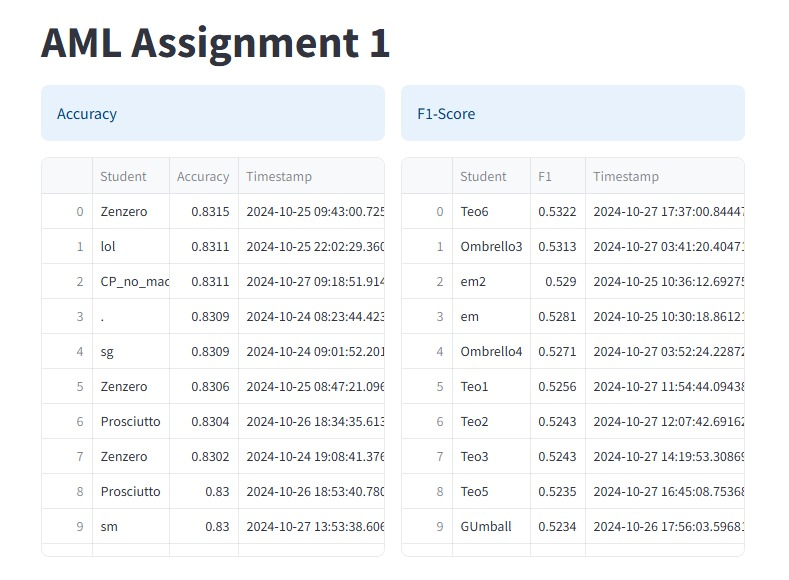

In [ ]:
from sklearn.utils import class_weight

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced',
                                                   classes=np.unique(y_train_np),
                                                   y=y_train_np)

# Convert class weights to a dictionary
class_weight_dict = dict(enumerate(class_weights))

# Train the model
history2 = model2.fit(X_train, y_train_np,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=128,
                    class_weight=class_weight_dict,
                    callbacks=[early_stopping]
                      )

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.3875 - loss: 0.8500 - precision: 0.2178 - recall: 0.6695 - val_accuracy: 0.4144 - val_loss: 0.7690 - val_precision: 0.2570 - val_recall: 0.8227
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5603 - loss: 0.7055 - precision: 0.2930 - recall: 0.6926 - val_accuracy: 0.5958 - val_loss: 0.7197 - val_precision: 0.3225 - val_recall: 0.6943
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6423 - loss: 0.6814 - precision: 0.3371 - recall: 0.6253 - val_accuracy: 0.6992 - val_loss: 0.6787 - val_precision: 0.3990 - val_recall: 0.6175
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6883 - loss: 0.6636 - precision: 0.3815 - recall: 0.6125 - val_accuracy: 0.7288 - val_loss: 0.6590 - val_precision: 0.4326 - val_recall: 0.5886
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7124 - loss: 0.6512 - precision: 0.4029 - recall: 0.6148 - val_accuracy: 0.7354 - val

###Model 3

In [ ]:
y_train_np_under = y_train_under.to_numpy()

# Train the model
history3 = model3.fit(X_train_under, y_train_np_under,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5358 - loss: 0.8557 - precision: 0.5519 - recall: 0.3603 - val_accuracy: 0.4543 - val_loss: 0.7718 - val_precision: 0.2740 - val_recall: 0.8376
Epoch 2/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6160 - loss: 0.6880 - precision: 0.6251 - recall: 0.6114 - val_accuracy: 0.6368 - val_loss: 0.6855 - val_precision: 0.3486 - val_recall: 0.6734
Epoch 3/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6523 - loss: 0.6525 - precision: 0.6707 - recall: 0.5953 - val_accuracy: 0.7038 - val_loss: 0.6513 - val_precision: 0.4067 - val_recall: 0.6376
Epoch 4/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6736 - loss: 0.6439 - precision: 0.6891 - recall: 0.6278 - val_accuracy: 0.7132 - val_loss: 0.6455 - val_precision: 0.4181 - val_recall: 0.6419
Epoch 5/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6716 - loss: 0.6387 - precision: 0.6812 - recall: 0.6105 - val_accuracy: 0.7274 - val_loss: 0.

## Validate the model and comment the results

please describe the evaluation procedure on a validation set, commenting the generalization capability of your model (e.g. under/overfitting). You may also describe the performance metrics that you choose: what is the most suitable performance measure (or set of performance measures) in this case/dataset, according to you? Why?

For all three models I have calculated the threshold of the binary output using the ROC curve, to optimize the results.

In every model I gave in as metrics accuracy, precision and recall. This way I was able to display all the plots of the training and I was able to calculate and show the plot of the f1 score too.

I think the f1 score is very important with the given dataset, due to the unbalance of the target. It's very important to verify that the dataset isn't just guessing the majority class, which is what usually happens, because given the big unbalance, the accuracy level of a model that only guesses the majority class could look decently good at first glance.

We can see how the first model reaches better results for accuracy, with no overfitting, but doesn't have a good f1 score. As we can see, this model is mainly guessing the majority class, and this is how it's able to reach good levels of accuracy.

The second and the third model try to tackle this problem, by either weighting the classes or by undersampling. In both cases, the accuracy slightly decreases but the f1 score increases. There could be some underfitting in these models, but I belive it's mostly just the results of my attempts to make the performance better.

Anyways, the results reached by every model are far from being satisfactory. There are of course more things that I could try to improve the model, for example there's more features engineering to be done, to possibly reduce the features, removing some of the highly correlated ones, or by calculating new ones. However, I don't think it's worth the time. I believe the problem lies in the dataset itself and in the features, clearly not giving enough information to predict the target. For instanece, there isn't a single feature about the economic conditions of the country (interest rates, unemplyment and inflation are just few really important metrics in my opinion), which I believe would help massively.

I have even tried to reduce the neural network massively, by just having 1 node in 1 hidden layer, and the results are not far off these models. I believe this is a clear indicator that there isn't much to learn from this dataset, for the given target, and given the massive unbalance of the target and of most of the features.

###Model 1

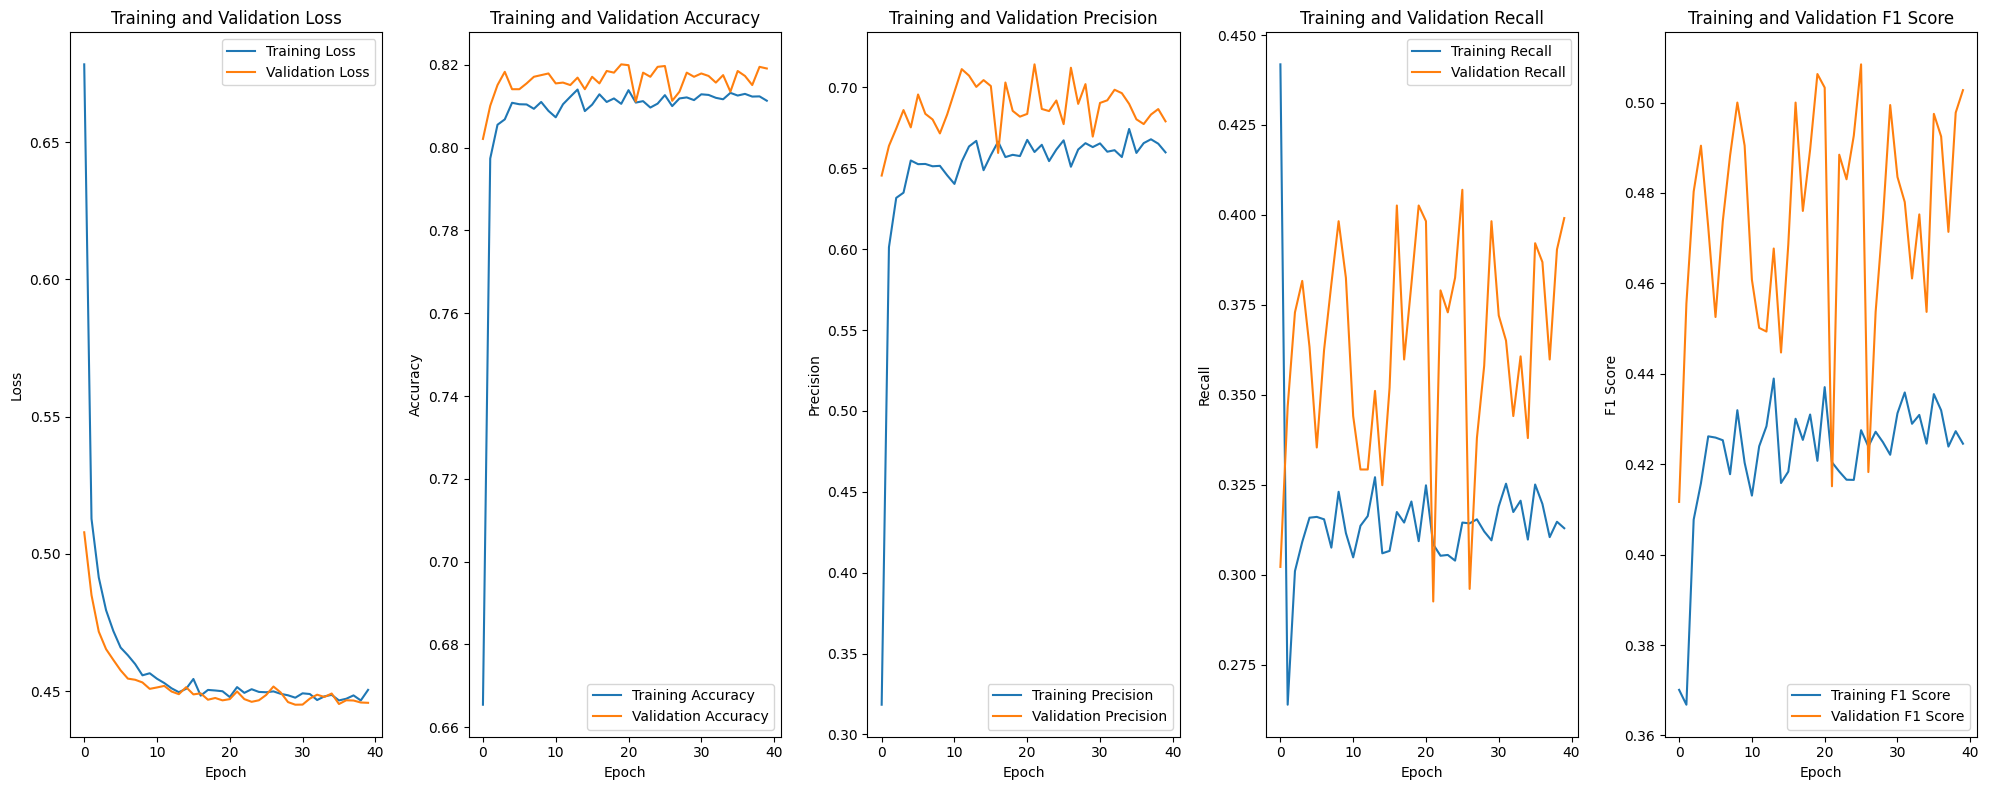

In [ ]:
from keras import backend as K

# Calculate F1 score using precision and recall
f1_train = 2 * (np.array(history.history['precision']) * np.array(history.history['recall'])) / (
    np.array(history.history['precision']) + np.array(history.history['recall']) + K.epsilon()
)

f1_val = 2 * (np.array(history.history['val_precision']) * np.array(history.history['val_recall'])) / (
    np.array(history.history['val_precision']) + np.array(history.history['val_recall']) + K.epsilon()
)

plt.figure(figsize=(20, 8))

# Loss plot
plt.subplot(1, 5, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Accuracy plot
plt.subplot(1, 5, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Precision plot
plt.subplot(1, 5, 3)
plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.title('Training and Validation Precision')

# Recall plot
plt.subplot(1, 5, 4)
plt.plot(history.history['recall'], label='Training Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.title('Training and Validation Recall')

# F1 Score plot
plt.subplot(1, 5, 5)
plt.plot(f1_train, label='Training F1 Score')
plt.plot(f1_val, label='Validation F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.title('Training and Validation F1 Score')

plt.tight_layout()
plt.show()

In [ ]:
# Get predictions
y_pred_prob = model.predict(X_val)

# Convert probabilities to binary predictions (0 or 1) using a threshold "optimal_threshold"
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Flatten in case of 2D array

# Print classification report
print(classification_report(y_val, y_pred))

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3852
           1       0.67      0.40      0.50      1145

    accuracy                           0.82      4997
   macro avg       0.75      0.67      0.69      4997
weighted avg       0.80      0.82      0.80      4997



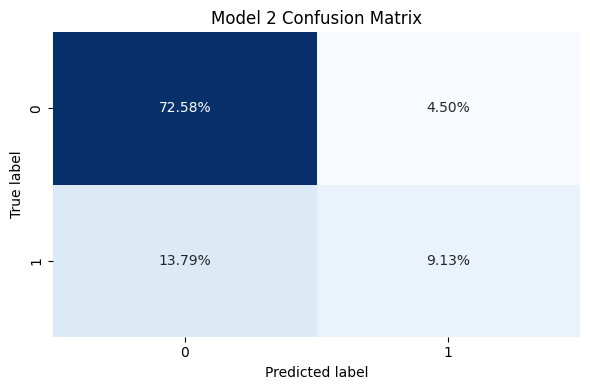

In [ ]:
# Compute binary confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Calculate percentages for each section of the confusion matrix
conf_matrix_percentage = conf_matrix / conf_matrix.sum()

# Plot the binary confusion matrix with percentages
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_percentage, annot=True, cmap="Blues", fmt=".2%", cbar=False)

plt.title('Model 2 Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

###Model 2

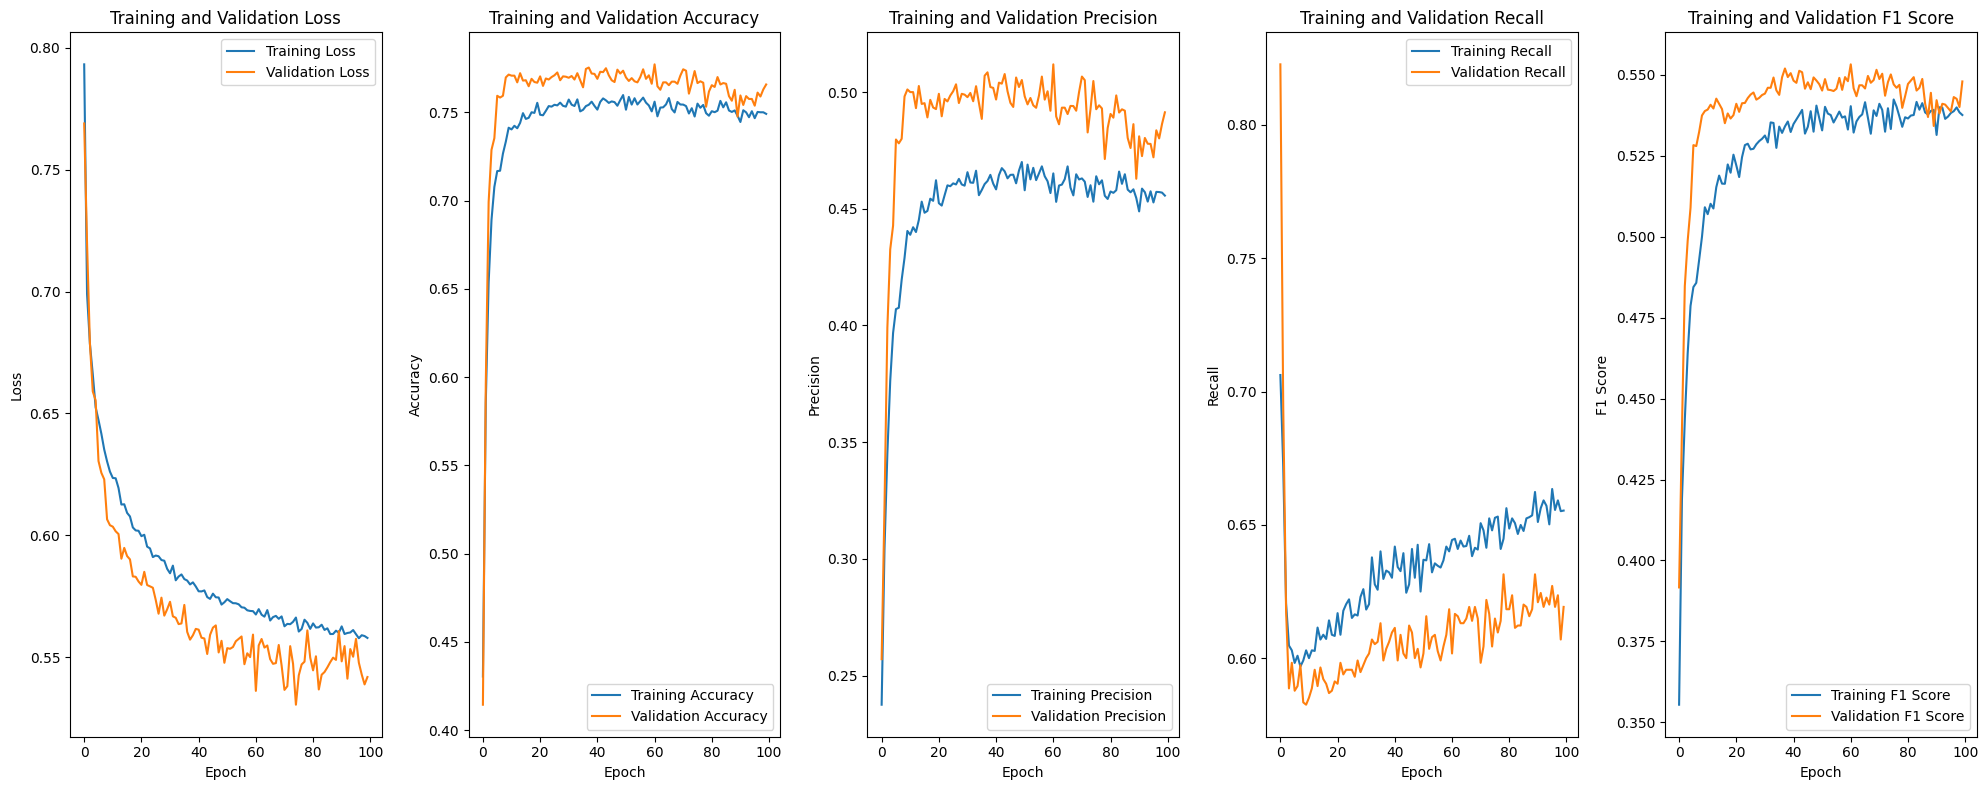

In [ ]:
from keras import backend as K

# Calculate F1 score using precision and recall
f1_train = 2 * (np.array(history2.history['precision']) * np.array(history2.history['recall'])) / (
    np.array(history2.history['precision']) + np.array(history2.history['recall']) + K.epsilon()
)

f1_val = 2 * (np.array(history2.history['val_precision']) * np.array(history2.history['val_recall'])) / (
    np.array(history2.history['val_precision']) + np.array(history2.history['val_recall']) + K.epsilon()
)

plt.figure(figsize=(20, 8))

# Loss plot
plt.subplot(1, 5, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Accuracy plot
plt.subplot(1, 5, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Precision plot
plt.subplot(1, 5, 3)
plt.plot(history2.history['precision'], label='Training Precision')
plt.plot(history2.history['val_precision'], label='Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.title('Training and Validation Precision')

# Recall plot
plt.subplot(1, 5, 4)
plt.plot(history2.history['recall'], label='Training Recall')
plt.plot(history2.history['val_recall'], label='Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.title('Training and Validation Recall')

# F1 Score plot
plt.subplot(1, 5, 5)
plt.plot(f1_train, label='Training F1 Score')
plt.plot(f1_val, label='Validation F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.title('Training and Validation F1 Score')

plt.tight_layout()
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


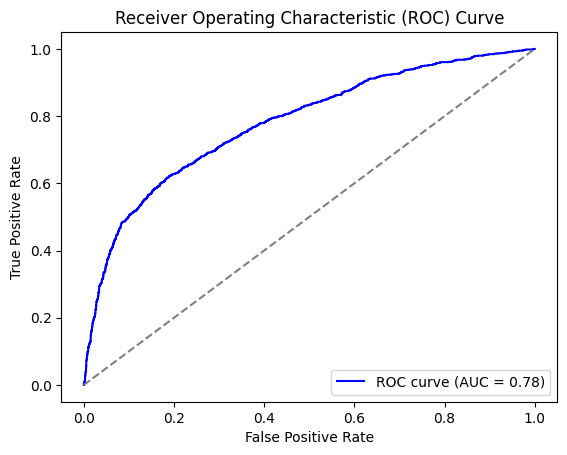

Optimal Threshold: 0.4925767


In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predictions
y_pred_prob = model2.predict(X_val)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]
print('Optimal Threshold:', optimal_threshold)



In [ ]:
# Convert probabilities to binary predictions (0 or 1) using a threshold "optimal_threshold"
y_pred = (y_pred_prob > optimal_threshold).astype(int).flatten()  # Flatten in case of 2D array

# Print classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      3852
           1       0.50      0.62      0.55      1145

    accuracy                           0.77      4997
   macro avg       0.69      0.72      0.70      4997
weighted avg       0.79      0.77      0.78      4997



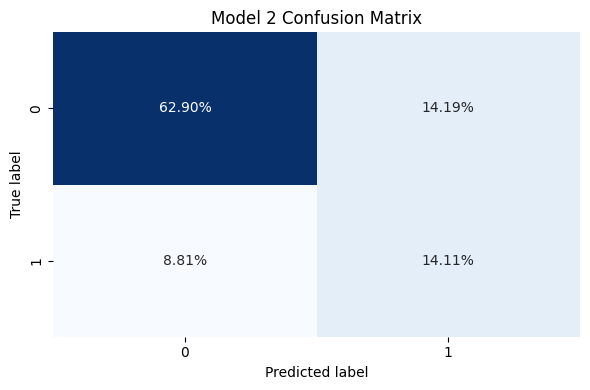

In [ ]:
# Compute binary confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Calculate percentages for each section of the confusion matrix
conf_matrix_percentage = conf_matrix / conf_matrix.sum()

# Plot the binary confusion matrix with percentages
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_percentage, annot=True, cmap="Blues", fmt=".2%", cbar=False)

plt.title('Model 2 Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

###Model 3

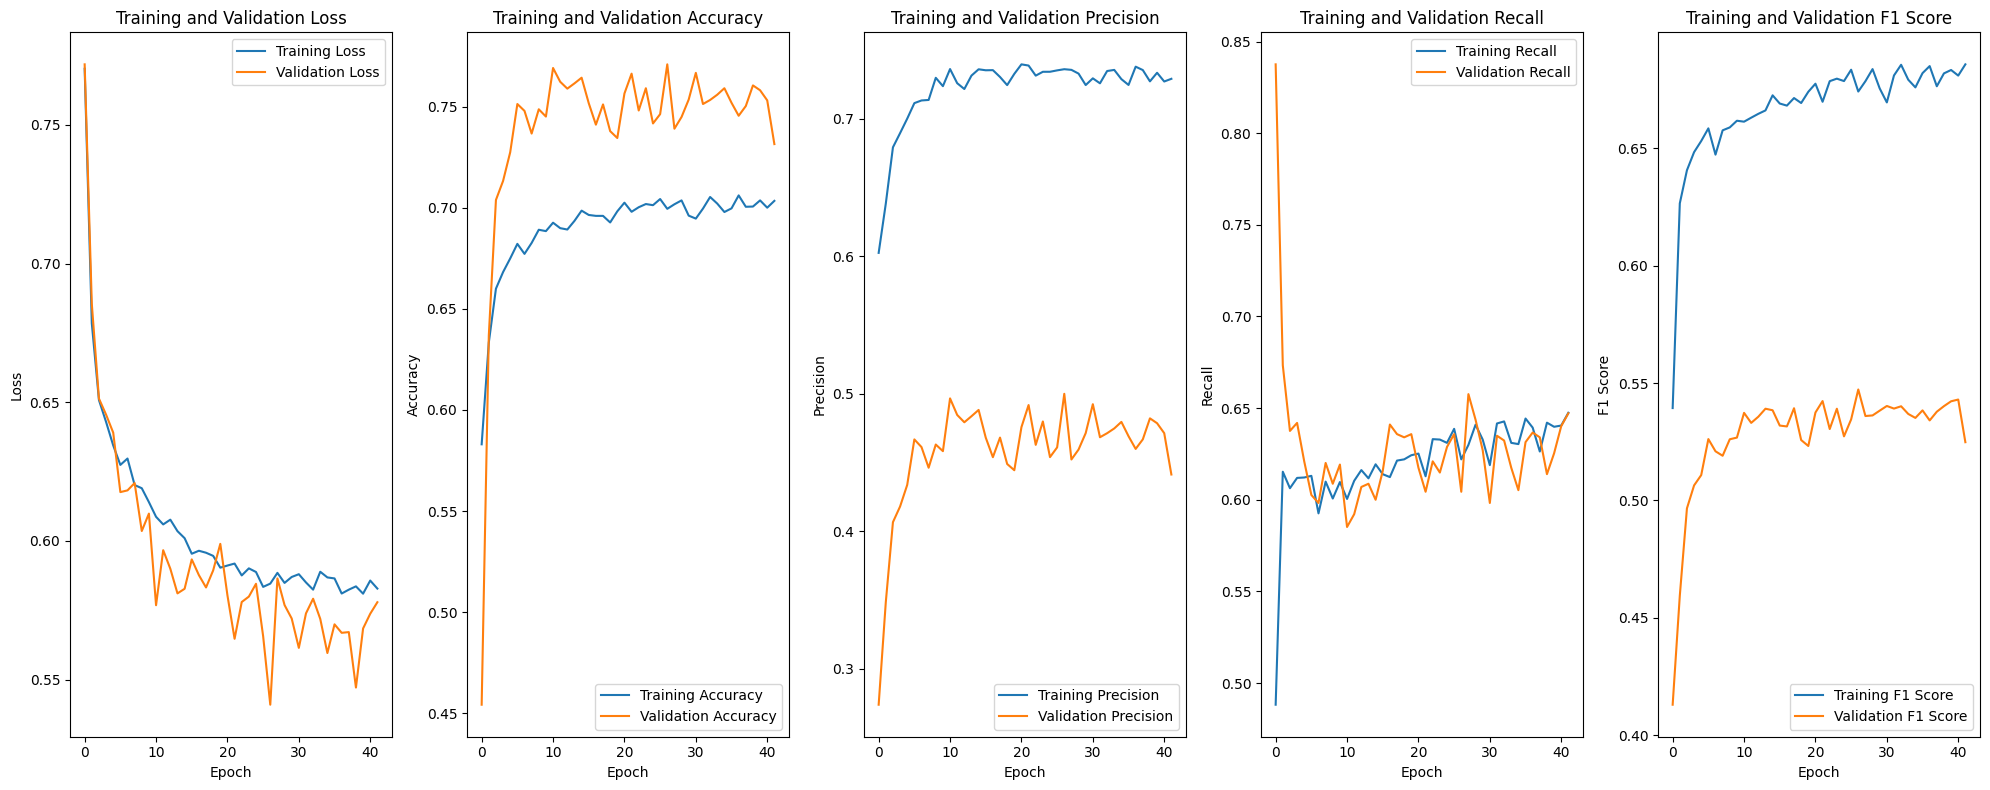

In [ ]:
from keras import backend as K

# Calculate F1 score using precision and recall
f1_train = 2 * (np.array(history3.history['precision']) * np.array(history3.history['recall'])) / (
    np.array(history3.history['precision']) + np.array(history3.history['recall']) + K.epsilon()
)

f1_val = 2 * (np.array(history3.history['val_precision']) * np.array(history3.history['val_recall'])) / (
    np.array(history3.history['val_precision']) + np.array(history3.history['val_recall']) + K.epsilon()
)

plt.figure(figsize=(20, 8))

# Loss plot
plt.subplot(1, 5, 1)
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Accuracy plot
plt.subplot(1, 5, 2)
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Precision plot
plt.subplot(1, 5, 3)
plt.plot(history3.history['precision'], label='Training Precision')
plt.plot(history3.history['val_precision'], label='Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.title('Training and Validation Precision')

# Recall plot
plt.subplot(1, 5, 4)
plt.plot(history3.history['recall'], label='Training Recall')
plt.plot(history3.history['val_recall'], label='Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.title('Training and Validation Recall')

# F1 Score plot
plt.subplot(1, 5, 5)
plt.plot(f1_train, label='Training F1 Score')
plt.plot(f1_val, label='Validation F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.title('Training and Validation F1 Score')

plt.tight_layout()
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


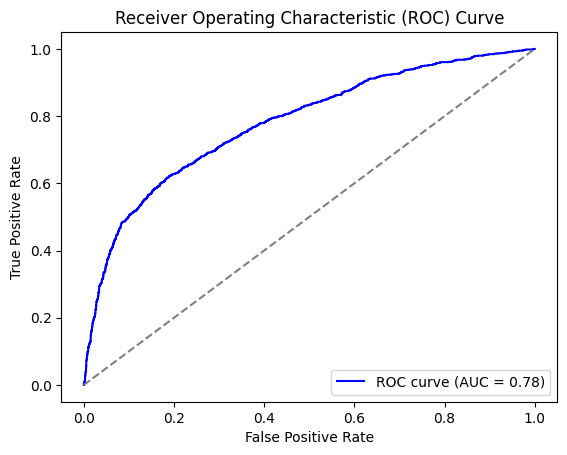

Optimal Threshold: 0.4925767


In [ ]:
# Get predictions
y_pred_prob = model2.predict(X_val)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]
print('Optimal Threshold:', optimal_threshold)

In [ ]:
# Get predictions
y_pred_prob = model3.predict(X_val)

# Convert probabilities to binary predictions (0 or 1) using a threshold "optimal_threshold"
y_pred = (y_pred_prob > optimal_threshold).astype(int).flatten()  # Flatten in case of 2D array

# Print classification report
print(classification_report(y_val, y_pred))

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      3852
           1       0.49      0.61      0.55      1145

    accuracy                           0.77      4997
   macro avg       0.68      0.71      0.70      4997
weighted avg       0.79      0.77      0.78      4997



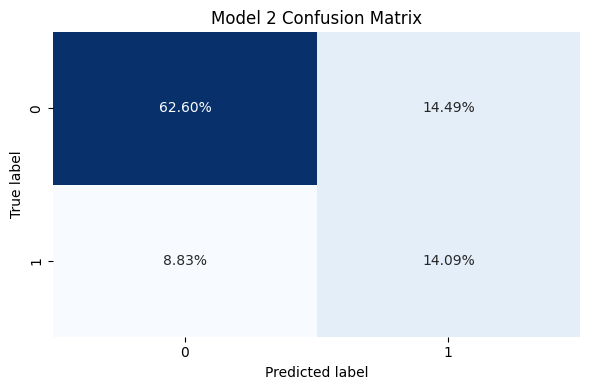

In [ ]:
# Compute binary confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Calculate percentages for each section of the confusion matrix
conf_matrix_percentage = conf_matrix / conf_matrix.sum()

# Plot the binary confusion matrix with percentages
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_percentage, annot=True, cmap="Blues", fmt=".2%", cbar=False)

plt.title('Model 2 Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

## Make predictions (on the provided test set)

Based on the results obtained and analyzed during the training and the validation phases, what are your (rather _personal_) expectations with respect to the performances of your model on the blind external test set? Briefly motivate your answer.

I have already answered part of this question in the previous question, but I would expect results to be similar to the validation set. However, it's important to note that (give the really low f1-score of the minority class), performance can vary significantly based on the distribution of the test set. A test set with just instances of the majority class would receive good levels of f1 score, but it would be very misleading.

In [ ]:
y_pred_prob = model3.predict(X_test)

# Convert probabilities to binary predictions (0 or 1) using a threshold "optimal_threshold"
y_pred = (y_pred_prob > optimal_threshold).astype(int).flatten()

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


# OPTIONAL -- Export the predictions in the format indicated in the assignment release page and verify you prediction on the [assessment page](https://aml-assignmentone-2425.streamlit.app/).

In [ ]:
predictions_df = pd.DataFrame(y_pred)

predictions_df.to_csv('predictions.csv', index=False, header=False)

from google.colab import files

# Download the CSV file
files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>